# Life Expectancy (WHO)

##### **Студент:**
- ФИ: Семенова Екатерина
- Группа: MMP212
- Email: ebsemenova@edu.hse.ru
- Дата: 14.12.2022
- Источник данных: <code>[kaggle.ru](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)</code>

### **Контекст:**
В прошлом было проведено уже множество исследований факторов, влияющих на ожидаемую продолжительность жизни, с учетом демографических переменных, состава доходов и уровня смертности. Однако выяснилось, что в предыдущих исследованиях не учитывалось влияние иммунизации и индекса человеческого развития на пронозируемый фактор продолжительности жизни. Данный набор данных был сформирован с целью исследования влияния факторов здоровья и экономических факторов на ожидаемую продолжительность жизни в различных странах мира. 

### **О наборе данных:**
Набор данных включает в себя данные об ожидаемой продолжительности жизни, а также о пронозируемых факторах для 193 стран, собранные за 2000-2015 гг. Данные о факторах здоровья населения стран были собраны с помощью базы данных ВОЗ (Всемирной Организации Здравоохранения), а экономические показатели - с веб-сайта ООН (Организации Объединенных Наций). 

Набор данных состоит из 22 переменных и 2938 наблюдений. 20 переменных датасета являются независимыми, то есть прогнозируемыми в вопросе предсказывания продолжительности жизни населения. Все прогностические переменные были разделены на несколько широких категорий: факторы, связанные с иммунизацией, факторы смертности, экономические и социальные факторы.

### **Переменные:**

* **Country** - cтрана (193 страны)
* **Year** - Год (с 2000 по 2015 гг.)

**Прогнозируемый фактор**
* **Life expectancy** - ожидаемая продолжительность жизни (в годах)

**Экономические факторы:**
* **Status** - Статус развития страны. Бинарная: Developed - развитая, Developing - развивающаяся)
* **Percentage expenditure** - Расходы на здравоохранение (в % от ВВП на душу населения)
* **Total expenditure** - Общие государственные расходы на здравоохранение (в % от общих государственных расходов)
* **GDP** - 	Валовой Внутренний Продукт (ВВП) на душу населения (в долларах США)
* **Population** - Население страны, человек
* **Income composition of resources** - Индекс человеческого развития (ИЧР) с точки зрения доходной структуры ресурсов (индекс от 0 до 1)
* **Schooling** - Суммарное количество лет обучения (лет)

**Факторы здоровья:**
* **Alcohol** - Потребление алкоголя на душу населения (15+) (в литрах чистого спирта)
* **BMI** - Средний индекс массы тела (ИМТ) всего населения
* **Thinness 1-19 years** - Распространенность худобы среди детей и подростков в возрасте от 1 до 19 лет (%)
* **Thinness 5-9 years** - Распространенность худобы среди детей в возрасте от 5 до 9 лет (%)

**Факторы смертности:**
* **Adult Mortality** - Смертность взрослого населения обоих полов (вероятность, в возрасте от 15 до 60 лет на 1000 человек населения)
* **Infant Deaths** - Количество младенческих смертей на 1000 человек населения
* **Under-five deaths** - Количество смертей детей в возрасте до пяти лет на 1000 человек населения

**Факторы иммунизации:**
* **Hepatitis B** - Гепатит, охват иммунизацией среди детей в возрасте 1 года (%)
* **Polio** - Полиомиелит, охват иммунизацией среди детей в возрасте 1 года (%)
* **Diphtheria** - Дифтерия, охват прививками от дифтерийно-столбнячного анатоксина и коклюша среди детей в возрасте 1 года (%)
* **HIV/AIDS** - Смертность на 1000 живорождений ВИЧ/СПИД (0-4 года)
* **Measles** - Корь, число зарегистрированных случаев заражения на 1000 населения

### **План работы:**

1.   Цель и задачи исследования
2.   Предобработка данных: переименование колонок, работы с пропусками
3.   Выбросы: выявление и визуализация отклонений
4.   EDA: описательные статистики, визуализация основных переменных
5.   Построение модели: выдвижение гипотез и линейная регрессия
6.   Ключевые выводы и ограничения




---
# **1. Цель и задачи исследования**

##### **Цель -** проанализировать данные 193 стран, содержащие информацию об уровне ожидаемой продолжительности жизни и факторах экономики, здоровья, смерности и иммунизации, а также выявить взаимосвязи между зависимой переменной ожидаемой продолжительности жизни и независимыми переменными. 

##### **Задачи:** 
* Исследовать, какие факторы влияют на ожидаемую продолжительность жизни?
* Показать, влияют ли факторы младенческой и взрослой смертности на ожидаемую продолжительность жизни?
* Исследовать, каково влияние образования на продолжительность жизни человека?
* Изучить, имеет ли ожидаемая продолжительность жизни положительную или отрицательную связь с употреблением алкоголя?
* Имеют ли густонаселенные страны более низкую продолжительность жизни?
* Как влияет охват иммунизацией на ожидаемую продолжительность жизни?
---



In [170]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [171]:
#Импортируем необходимые библиотеки

# раскомментируйте строчку ниже, чтобы усановить библиотеку
#!pip install plotly==4.14.3 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

import scipy.stats
import statsmodels.api as sm

---
# **2. Импорт и предобработка данных**
---



In [172]:
#Импортируем данные из формата .csv и выводим первые 5 строк датафрейма 
life_exp = pd.read_csv('/content/sample_data/life_expectancy_data.csv', sep=',')
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [173]:
life_exp.shape #Набор данных содержит 22 переменные и 2938 наблюдения

(2938, 22)

In [174]:
#Выведем частотную таблицу для стран в датасете
life_exp['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [175]:
#Переименуем для удобства колонки, переведя их с английского на русский язык  
life_exp.rename(columns = {
                            'Country': 'Страна', 
                            'Year': 'Год',
                            'Status': 'Статус',
                            'Life expectancy ': 'Ожидаемая продолжительность жизни', 
                            'Adult Mortality': 'Взрослая смертность', 
                            'infant deaths': 'Младенческая смертность', 
                            'Alcohol': 'Потребление алкоголя', 
                            'percentage expenditure': 'Затраты на здрав-е, % от ВВП', 
                            'Hepatitis B': 'Иммунизация гепатит В, %', 
                            'Measles ': "Корь, число зараженных", 
                            ' BMI ': 'Средний ИМТ',
                            'under-five deaths ': 'Смертность до 5 лет',
                            'Polio': 'Иммунизация полиомиелит, %',
                            'Total expenditure': 'Затраты на здрав-е, % от гос.расходов',
                            'Diphtheria ': 'Иммунизация дифтерия, %',
                            ' HIV/AIDS': 'Смертность от ВИЧ/СПИД',
                            'GDP': 'ВВП',
                            'Population': 'Население',
                            ' thinness  1-19 years': 'Детская худоба, от 1 до 19 лет',
                            ' thinness 5-9 years': 'Детская худоба, от 5 до 9 лет',
                            'Income composition of resources': 'ИЧР',
                            'Schooling': 'Количество лет обучения'}, inplace = True)
life_exp.head()

,Страна,Год,Статус,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Потребление алкоголя,"Затраты на здрав-е, % от ВВП","Иммунизация гепатит В, %","Корь, число зараженных",...,"Иммунизация полиомиелит, %","Затраты на здрав-е, % от гос.расходов","Иммунизация дифтерия, %",Смертность от ВИЧ/СПИД,ВВП,Население,"Детская худоба, от 1 до 19 лет","Детская худоба, от 5 до 9 лет",ИЧР,Количество лет обучения
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [176]:
#Запишем все количественные переменные в один датафрейм для удобства в дальнейшей работе
num_features = ['Ожидаемая продолжительность жизни', 
                'Взрослая смертность', 'Младенческая смертность', 'Смертность до 5 лет', 
                'Потребление алкоголя', 'Средний ИМТ', 'Детская худоба, от 1 до 19 лет', 'Детская худоба, от 5 до 9 лет', 
                'ВВП', 'Население', 'ИЧР', 'Количество лет обучения', 'Затраты на здрав-е, % от ВВП', 'Затраты на здрав-е, % от гос.расходов', 
                'Иммунизация гепатит В, %', 'Иммунизация полиомиелит, %', 'Иммунизация дифтерия, %', 'Корь, число зараженных', 'Смертность от ВИЧ/СПИД']

#Также, отдельно сгруппируем количественные переменные по факторам ожидаемой продолжительности жизни вместе с целевой переменной "Ожидаемая продолжительность жизни" 
econ_features = ['Ожидаемая продолжительность жизни', 
                'ВВП', 'Население', 'ИЧР', 'Количество лет обучения', 'Затраты на здрав-е, % от ВВП', 'Затраты на здрав-е, % от гос.расходов']
health_features = ['Ожидаемая продолжительность жизни', 
                'Потребление алкоголя', 'Средний ИМТ', 'Детская худоба, от 1 до 19 лет', 'Детская худоба, от 5 до 9 лет']
mortal_features = ['Ожидаемая продолжительность жизни', 
                'Взрослая смертность', 'Младенческая смертность', 'Смертность до 5 лет']
immun_features = ['Ожидаемая продолжительность жизни', 
                'Иммунизация гепатит В, %', 'Иммунизация полиомиелит, %', 'Иммунизация дифтерия, %', 'Корь, число зараженных', 'Смертность от ВИЧ/СПИД']

#Запишем все количественные переменные в один датафрейм для удобства в дальнейшей работе вместе с показателем статуса страны для дальнейшего исследования
num_features_status = ['Статус', 'Ожидаемая продолжительность жизни', 
                'Взрослая смертность', 'Младенческая смертность', 'Смертность до 5 лет', 
                'Потребление алкоголя', 'Средний ИМТ', 'Детская худоба, от 1 до 19 лет', 'Детская худоба, от 5 до 9 лет', 
                'ВВП', 'Население', 'ИЧР', 'Количество лет обучения', 'Затраты на здрав-е, % от ВВП', 'Затраты на здрав-е, % от гос.расходов', 
                'Иммунизация гепатит В, %', 'Иммунизация полиомиелит, %', 'Иммунизация дифтерия, %', 'Корь, число зараженных', 'Смертность от ВИЧ/СПИД']

#Также, отдельно сгруппируем количественные переменные по факторам ожидаемой продолжительности жизни вместе с целевой переменной "Ожидаемая продолжительность жизни" вместе с показателем статуса страны
econ_features_status = ['Статус', 'Ожидаемая продолжительность жизни', 
                'ВВП', 'Население', 'ИЧР', 'Количество лет обучения', 'Затраты на здрав-е, % от ВВП', 'Затраты на здрав-е, % от гос.расходов']
health_features_status = ['Статус','Ожидаемая продолжительность жизни', 
                'Потребление алкоголя', 'Средний ИМТ', 'Детская худоба, от 1 до 19 лет', 'Детская худоба, от 5 до 9 лет']
mortal_features_status = ['Статус','Ожидаемая продолжительность жизни', 
                'Взрослая смертность', 'Младенческая смертность', 'Смертность до 5 лет']
immun_features_status = ['Статус','Ожидаемая продолжительность жизни', 
                'Иммунизация гепатит В, %', 'Иммунизация полиомиелит, %', 'Иммунизация дифтерия, %', 'Корь, число зараженных', 'Смертность от ВИЧ/СПИД']

#Выделим нашу единственную категориальную переменную 
cat_features = ['Статус']

In [177]:
#Выводим общую информацию об исследуемых 22 объектах в датафрейме. 
life_exp.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Страна                                 2938 non-null   object 
 1   Год                                    2938 non-null   int64  
 2   Статус                                 2938 non-null   object 
 3   Ожидаемая продолжительность жизни      2928 non-null   float64
 4   Взрослая смертность                    2928 non-null   float64
 5   Младенческая смертность                2938 non-null   int64  
 6   Потребление алкоголя                   2744 non-null   float64
 7   Затраты на здрав-е, % от ВВП           2938 non-null   float64
 8   Иммунизация гепатит В, %               2385 non-null   float64
 9   Корь, число зараженных                 2938 non-null   int64  
 10  Средний ИМТ                            2904 non-null   float64
 11  Смер

In [178]:
#Определяем наличие пропусков в наборе данных. Видим, что пропущенные значения присутсвуют в датасете. С ними мы будем работать далее. 
life_exp.isnull().sum() 

Страна                                     0
Год                                        0
Статус                                     0
Ожидаемая продолжительность жизни         10
Взрослая смертность                       10
Младенческая смертность                    0
Потребление алкоголя                     194
Затраты на здрав-е, % от ВВП               0
Иммунизация гепатит В, %                 553
Корь, число зараженных                     0
Средний ИМТ                               34
Смертность до 5 лет                        0
Иммунизация полиомиелит, %                19
Затраты на здрав-е, % от гос.расходов    226
Иммунизация дифтерия, %                   19
Смертность от ВИЧ/СПИД                     0
ВВП                                      448
Население                                652
Детская худоба, от 1 до 19 лет            34
Детская худоба, от 5 до 9 лет             34
ИЧР                                      167
Количество лет обучения                  163
dtype: int

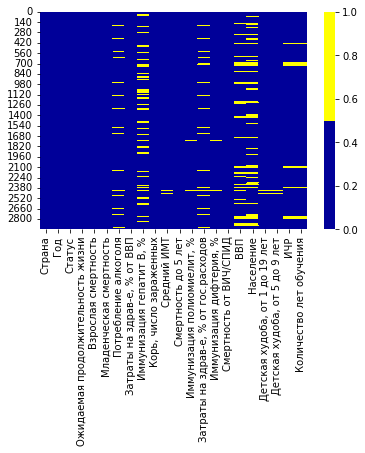

In [179]:
#Построим тепловую карту пропусков в датасете. Видим, что пропуски содержатся в различных наблюдениях и не сгруппированы в каких-то одних странах. В связи с этим прибегнем к заполнению пропусков значениями.
cols = life_exp.columns[:30] # первые 30 колонок
#Определяем цвета: желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(life_exp[cols].isnull(), cmap=sns.color_palette(colours))

In [180]:
#Расчитаем медианные значения для переменных, содержащих пропуски
adult_mortality_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Взрослая смертность'].transform('median')
life_expectancy_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Ожидаемая продолжительность жизни'].transform('median')
aclo_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Потребление алкоголя'].transform('median')
hepatitis_b_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Иммунизация гепатит В, %'].transform('median')
bmi_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Средний ИМТ'].transform('median')
polio_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Иммунизация полиомиелит, %'].transform('median')
total_expenditure_median = life_exp.groupby([life_exp['Статус'], 'Статус'])['Затраты на здрав-е, % от гос.расходов'].transform('median')
diphtheria_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Иммунизация дифтерия, %'].transform('median')
gdp = life_exp.groupby([life_exp['Статус'], 'Год'])['ВВП'].transform('median')
population_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Население'].transform('median')
thinness_1_19_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Детская худоба, от 1 до 19 лет'].transform('median')
thinness_5_9_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Детская худоба, от 5 до 9 лет'].transform('median')
icr_median = life_exp.groupby([life_exp['Статус'], 'Год'])['ИЧР'].transform('median')
schooling_median = life_exp.groupby([life_exp['Статус'], 'Год'])['Количество лет обучения'].transform('median')

In [181]:
life_exp['Взрослая смертность'] = life_exp['Взрослая смертность'].fillna(adult_mortality_median)
life_exp['Ожидаемая продолжительность жизни'] = life_exp['Ожидаемая продолжительность жизни'].fillna(life_expectancy_median)
life_exp['Потребление алкоголя'] = life_exp['Потребление алкоголя'].fillna(aclo_median)
life_exp['Иммунизация гепатит В, %'] = life_exp['Иммунизация гепатит В, %'].fillna(hepatitis_b_median)
life_exp['Средний ИМТ'] = life_exp['Средний ИМТ'].fillna(bmi_median)
life_exp['Иммунизация полиомиелит, %'] = life_exp['Иммунизация полиомиелит, %'].fillna(polio_median)
life_exp['Затраты на здрав-е, % от гос.расходов'] = life_exp['Затраты на здрав-е, % от гос.расходов'].fillna(total_expenditure_median)
life_exp['Иммунизация дифтерия, %'] = life_exp['Иммунизация дифтерия, %'].fillna(diphtheria_median)
life_exp['ВВП'] = life_exp['ВВП'].fillna(gdp)
life_exp['Население'] = life_exp['Население'].fillna(population_median)
life_exp['Детская худоба, от 1 до 19 лет'] = life_exp['Детская худоба, от 1 до 19 лет'].fillna(thinness_1_19_median)
life_exp['Детская худоба, от 5 до 9 лет'] = life_exp['Детская худоба, от 5 до 9 лет'].fillna(thinness_5_9_median)
life_exp['ИЧР'] = life_exp['ИЧР'].fillna(icr_median)
life_exp['Количество лет обучения'] = life_exp['Количество лет обучения'].fillna(schooling_median)

In [182]:
#Повторно проверяем датасет на наличие пропусков. Пропусков нет, можем работать с набором данных дальше. 
life_exp.isnull().sum()

Страна                                   0
Год                                      0
Статус                                   0
Ожидаемая продолжительность жизни        0
Взрослая смертность                      0
Младенческая смертность                  0
Потребление алкоголя                     0
Затраты на здрав-е, % от ВВП             0
Иммунизация гепатит В, %                 0
Корь, число зараженных                   0
Средний ИМТ                              0
Смертность до 5 лет                      0
Иммунизация полиомиелит, %               0
Затраты на здрав-е, % от гос.расходов    0
Иммунизация дифтерия, %                  0
Смертность от ВИЧ/СПИД                   0
ВВП                                      0
Население                                0
Детская худоба, от 1 до 19 лет           0
Детская худоба, от 5 до 9 лет            0
ИЧР                                      0
Количество лет обучения                  0
dtype: int64

# **3. Выбросы: выявление и визуализация отклонений**

Text(0.5, 0.98, 'Ящичковые диаграммы для количественных переменных')

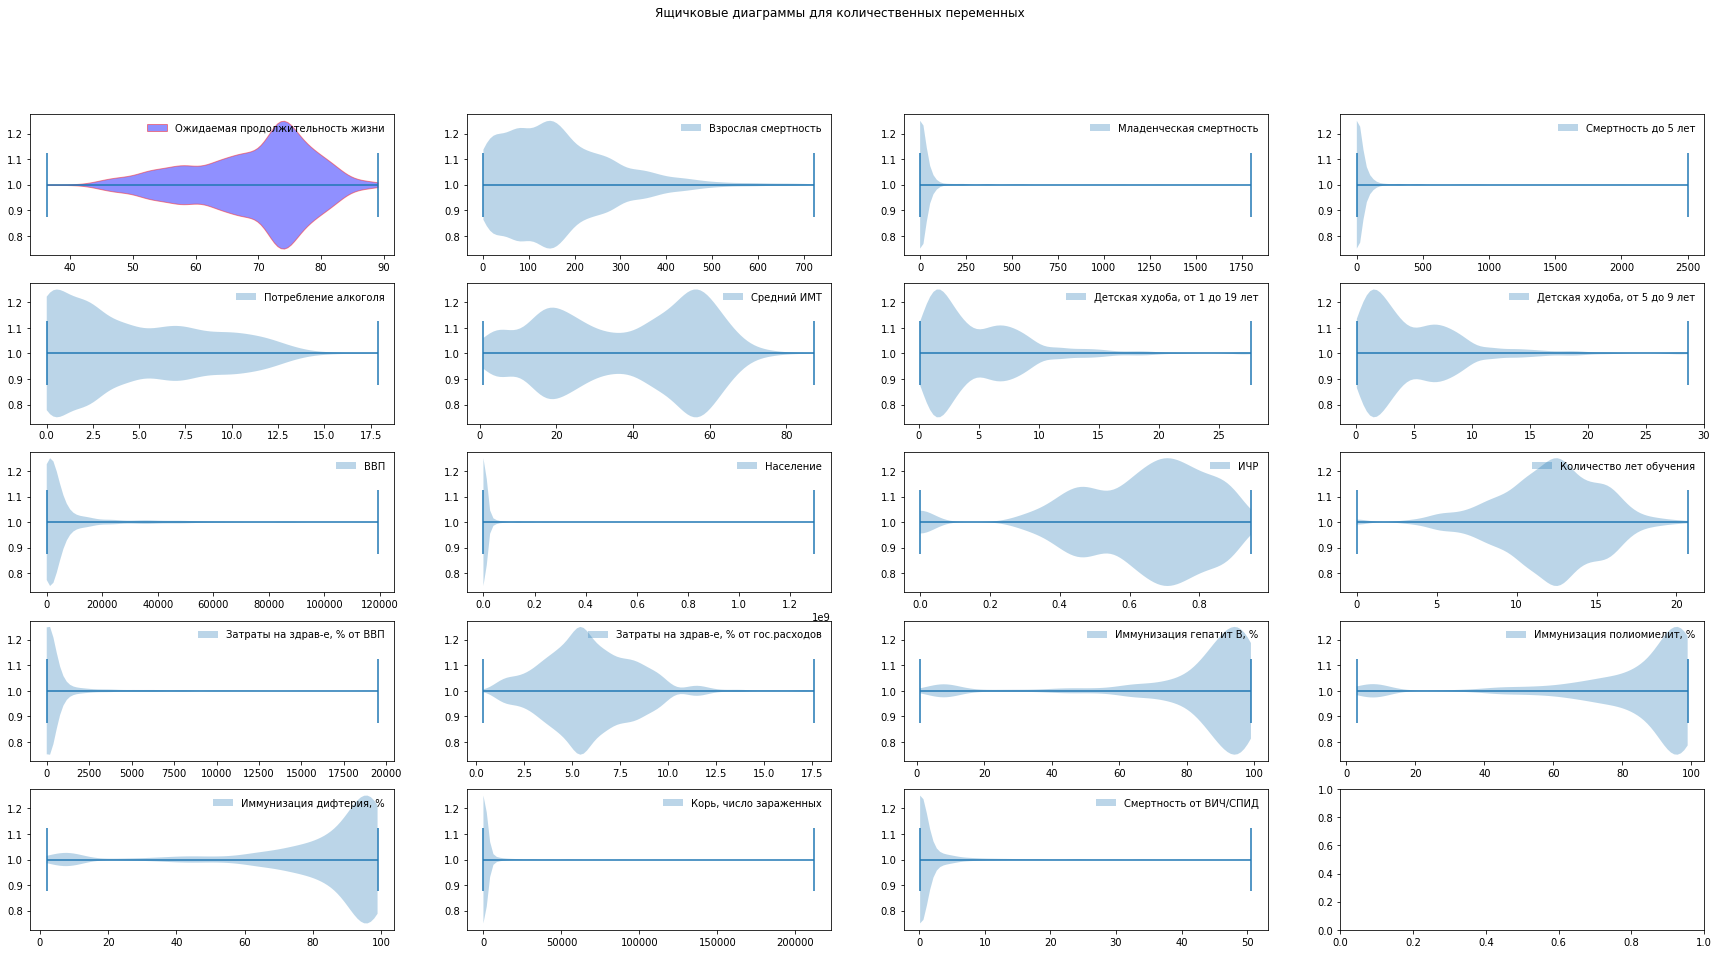

In [183]:
#Построим графики "ящик с усами" для всех количественных переменных, чтобы визуально оценить наличие выбросов.

fig, ax = plt.subplots(5,4, figsize=(30,15))

violin_target = ax[0][0].violinplot(life_exp['Ожидаемая продолжительность жизни'],vert=False)
ax[0][1].violinplot(life_exp['Взрослая смертность'],vert=False)
ax[0][2].violinplot(life_exp['Младенческая смертность'],vert=False)
ax[0][3].violinplot(life_exp['Смертность до 5 лет'],vert=False)
ax[1][0].violinplot(life_exp['Потребление алкоголя'],vert=False)
ax[1][1].violinplot(life_exp['Средний ИМТ'],vert=False)
ax[1][2].violinplot(life_exp['Детская худоба, от 1 до 19 лет'],vert=False)
ax[1][3].violinplot(life_exp['Детская худоба, от 5 до 9 лет'],vert=False)
ax[2][0].violinplot(life_exp['ВВП'],vert=False)
ax[2][1].violinplot(life_exp['Население'],vert=False)
ax[2][2].violinplot(life_exp['ИЧР'],vert=False)
ax[2][3].violinplot(life_exp['Количество лет обучения'],vert=False)
ax[3][0].violinplot(life_exp['Затраты на здрав-е, % от ВВП'],vert=False)
ax[3][1].violinplot(life_exp['Затраты на здрав-е, % от гос.расходов'],vert=False)
ax[3][2].violinplot(life_exp['Иммунизация гепатит В, %'],vert=False)
ax[3][3].violinplot(life_exp['Иммунизация полиомиелит, %'],vert=False)
ax[4][0].violinplot(life_exp['Иммунизация дифтерия, %'],vert=False)
ax[4][1].violinplot(life_exp['Корь, число зараженных'],vert=False)
ax[4][2].violinplot(life_exp['Смертность от ВИЧ/СПИД'],vert=False)

for vp in violin_target['bodies']:
    vp.set_facecolor('#2222ff')
    vp.set_edgecolor('#ff2222')
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

ax[0][0].legend(['Ожидаемая продолжительность жизни'], frameon=False)
ax[0][1].legend(['Взрослая смертность'], frameon=False)
ax[0][2].legend(['Младенческая смертность'], frameon=False)
ax[0][3].legend(['Смертность до 5 лет'], frameon=False)
ax[1][0].legend(['Потребление алкоголя'], frameon=False)
ax[1][1].legend(['Средний ИМТ'], frameon=False)
ax[1][2].legend(['Детская худоба, от 1 до 19 лет'], frameon=False)
ax[1][3].legend(['Детская худоба, от 5 до 9 лет'], frameon=False)
ax[2][0].legend(['ВВП'], frameon=False)
ax[2][1].legend(['Население'], frameon=False)
ax[2][2].legend(['ИЧР'], frameon=False)
ax[2][3].legend(['Количество лет обучения'], frameon=False)
ax[3][0].legend(['Затраты на здрав-е, % от ВВП'], frameon=False)
ax[3][1].legend(['Затраты на здрав-е, % от гос.расходов'], frameon=False)
ax[3][2].legend(['Иммунизация гепатит В, %'], frameon=False)
ax[3][3].legend(['Иммунизация полиомиелит, %'], frameon=False)
ax[4][0].legend(['Иммунизация дифтерия, %'], frameon=False)
ax[4][1].legend(['Корь, число зараженных'], frameon=False)
ax[4][2].legend(['Смертность от ВИЧ/СПИД'], frameon=False)

fig.suptitle('Ящичковые диаграммы для количественных переменных')

Заметим, что большинство переменных обладает достаточным кол-вом выбросов, которые необходимо удалить из датасета для того, чтобы аномальные значения переменных не оказывали существенное влияние на качество построения будущей модели. 

Находим выбросы для переменной "Младенческая смертность"

In [184]:
mean_infant_mortality = life_exp['Младенческая смертность'].mean()
std_infant_mortality = life_exp['Младенческая смертность'].std()
std_threshold_bottom_infant_mortality = mean_infant_mortality - 3 * std_infant_mortality
std_threshold_top_infant_mortality = mean_infant_mortality + 3 * std_infant_mortality
print(std_threshold_bottom_infant_mortality, std_threshold_top_infant_mortality) 

-323.47555567607196 384.0834522043225


In [185]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Младенческая смертность'] > std_threshold_top_infant_mortality].shape

(37, 22)

In [186]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Младенческая смертность'] < std_threshold_bottom_infant_mortality].shape

(0, 22)

In [187]:
life_exp = life_exp[life_exp['Младенческая смертность'] < std_threshold_top_infant_mortality]
life_exp.shape

(2901, 22)

Находим выбросы для переменной "Смерность до 5 лет"

In [188]:
mean_infant_mortality_5 = life_exp['Смертность до 5 лет'].mean()
std_infant_mortality_5 = life_exp['Смертность до 5 лет'].std()
std_threshold_bottom_infant_mortality_5 = mean_infant_mortality_5 - 3 * std_infant_mortality_5
std_threshold_top_infant_mortality_5 = mean_infant_mortality_5 + 3 * std_infant_mortality_5
print(std_threshold_bottom_infant_mortality_5, std_threshold_top_infant_mortality_5) 

-150.96878722223306 204.90122431289143


In [189]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Смертность до 5 лет'] > std_threshold_top_infant_mortality_5].shape

(67, 22)

In [190]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Смертность до 5 лет'] < std_threshold_bottom_infant_mortality_5].shape

(0, 22)

In [191]:
life_exp = life_exp[life_exp['Смертность до 5 лет'] < std_threshold_top_infant_mortality_5]
life_exp.shape

(2834, 22)

Находим выбросы для переменной "ВВП"

In [192]:
mean_gdp = life_exp['ВВП'].mean()
std_gdp = life_exp['ВВП'].std()
std_threshold_bottom_gdp = mean_gdp - 3 * std_gdp
std_threshold_top_gdp = mean_gdp + 3 * std_gdp
print(std_threshold_bottom_gdp, std_threshold_top_gdp) 

-33717.25473981767 47820.66790860842


In [193]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['ВВП'] > std_threshold_top_gdp].shape

(84, 22)

In [194]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['ВВП'] < std_threshold_bottom_gdp].shape

(0, 22)

In [195]:
life_exp = life_exp[life_exp['ВВП'] < std_threshold_top_gdp]
life_exp.shape

(2750, 22)

Находим выбросы для переменной "Население"

In [196]:
mean_population = life_exp['Население'].mean()
std_population = life_exp['Население'].std()
std_threshold_bottom_population = mean_population - 3 * std_population
std_threshold_top_population = mean_population + 3 * std_population
print(std_threshold_bottom_population, std_threshold_top_population)

-55239447.93120131 69537860.59333949


In [197]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Население'] > std_threshold_top_population].shape

(45, 22)

In [198]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Население'] < std_threshold_bottom_population].shape

(0, 22)

In [199]:
life_exp = life_exp[life_exp['Население'] < std_threshold_top_population]
life_exp.shape

(2705, 22)

Находим выбросы для переменной "Затраты на здрав-е, % от ВВП"

In [200]:
mean_percentage_expenditure = life_exp['Затраты на здрав-е, % от ВВП'].mean()
std_percentage_expenditure = life_exp['Затраты на здрав-е, % от ВВП'].std()
std_threshold_bottom_percentage_expenditure = mean_percentage_expenditure - 3 * std_percentage_expenditure
std_threshold_top_percentage_expenditure = mean_percentage_expenditure + 3 * std_percentage_expenditure
print(std_threshold_bottom_percentage_expenditure, std_threshold_top_percentage_expenditure)

-3115.01940165196 4142.380743434713


In [201]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Затраты на здрав-е, % от ВВП'] > std_threshold_top_percentage_expenditure].shape

(84, 22)

In [202]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Затраты на здрав-е, % от ВВП'] < std_threshold_bottom_percentage_expenditure].shape

(0, 22)

In [203]:
life_exp = life_exp[life_exp['Затраты на здрав-е, % от ВВП'] < std_threshold_top_percentage_expenditure]
life_exp.shape

(2621, 22)

Находим выбросы для переменной "Иммунизация гепатит В, %"

In [204]:
mean_hepatitis = life_exp['Иммунизация гепатит В, %'].mean()
std_hepatitis = life_exp['Иммунизация гепатит В, %'].std()
std_threshold_bottom_hepatitis = mean_hepatitis - 3 * std_hepatitis
std_threshold_top_hepatitis = mean_hepatitis + 3 * std_hepatitis
print(std_threshold_bottom_hepatitis, std_threshold_top_hepatitis)

15.863360132414115 150.53114578135927


In [205]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Иммунизация гепатит В, %'] > std_threshold_top_hepatitis].shape

(0, 22)

In [206]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Иммунизация гепатит В, %'] < std_threshold_bottom_hepatitis].shape

(145, 22)

In [207]:
#life_exp = life_exp[life_exp['Иммунизация гепатит В, %'] < std_threshold_top_hepatitis]
#life_exp.shape

Находим выбросы для переменной "Иммунизация полиомиелит, %"

In [208]:
mean_polio = life_exp['Иммунизация полиомиелит, %'].mean()
std_polio = life_exp['Иммунизация полиомиелит, %'].std()
std_threshold_bottom_polio = mean_polio - 3 * std_polio
std_threshold_top_polio = mean_polio + 3 * std_polio
print(std_threshold_bottom_polio, std_threshold_top_polio)

12.615801905545908 152.61693369155444


In [209]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Иммунизация полиомиелит, %'] > std_threshold_top_polio].shape

(0, 22)

In [210]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Иммунизация полиомиелит, %'] < std_threshold_bottom_polio].shape

(154, 22)

In [211]:
#life_exp = life_exp[life_exp['Иммунизация полиомиелит, %'] < std_threshold_top_polio]
#life_exp.shape

Находим выбросы для переменной "Иммунизация дифтерия, %"

In [212]:
mean_diphtheria = life_exp['Иммунизация дифтерия, %'].mean()
std_diphtheria  = life_exp['Иммунизация дифтерия, %'].std()
std_threshold_bottom_diphtheria  = mean_diphtheria - 3 * std_diphtheria
std_threshold_top_diphtheria  = mean_diphtheria + 3 * std_diphtheria
print(std_threshold_bottom_diphtheria, std_threshold_top_diphtheria)

11.37714122201163 153.32678857577548


In [213]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Иммунизация дифтерия, %'] > std_threshold_top_diphtheria].shape

(0, 22)

In [214]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Иммунизация дифтерия, %'] < std_threshold_bottom_diphtheria].shape

(155, 22)

In [215]:
#life_exp = life_exp[life_exp['Иммунизация дифтерия, %'] < std_threshold_top_diphtheria]
#life_exp.shape

Находим выбросы для переменной "Корь, число зараженных"

In [216]:
mean_measles = life_exp['Корь, число зараженных'].mean()
std_measles = life_exp['Корь, число зараженных'].std()
std_threshold_bottom_measles = mean_measles - 3 * std_measles
std_threshold_top_measles = mean_measles + 3 * std_measles
print(std_threshold_bottom_measles, std_threshold_top_measles)

-14776.645345926901 17255.12607847173


In [217]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Корь, число зараженных'] > std_threshold_top_measles].shape

(41, 22)

In [218]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Корь, число зараженных'] < std_threshold_bottom_measles].shape

(0, 22)

In [219]:
life_exp = life_exp[life_exp['Корь, число зараженных'] < std_threshold_top_measles]
life_exp.shape

(2580, 22)

Находим выбросы для переменной "Смертность от ВИЧ/СПИД"

In [220]:
mean_hiv_aids = life_exp['Смертность от ВИЧ/СПИД'].mean()
std_hiv_aids = life_exp['Смертность от ВИЧ/СПИД'].std()
std_threshold_bottom_hiv_aids = mean_hiv_aids - 3 * std_hiv_aids
std_threshold_top_hiv_aids = mean_hiv_aids + 3 * std_hiv_aids
print(std_threshold_bottom_hiv_aids, std_threshold_top_hiv_aids)

-14.132791075318664 17.83240347841944


In [221]:
#Нахожим кол-во выбросов по переменной (по верхней границе)
life_exp[life_exp['Смертность от ВИЧ/СПИД'] > std_threshold_top_hiv_aids].shape

(64, 22)

In [222]:
#Нахожим кол-во выбросов по переменной (по нижней границе)
life_exp[life_exp['Смертность от ВИЧ/СПИД'] < std_threshold_bottom_hiv_aids].shape

(0, 22)

In [223]:
life_exp = life_exp[life_exp['Смертность от ВИЧ/СПИД'] < std_threshold_top_hiv_aids]
life_exp.shape

(2516, 22)

Text(0.5, 0.98, 'Ящичковые диаграммы для количественных переменных')

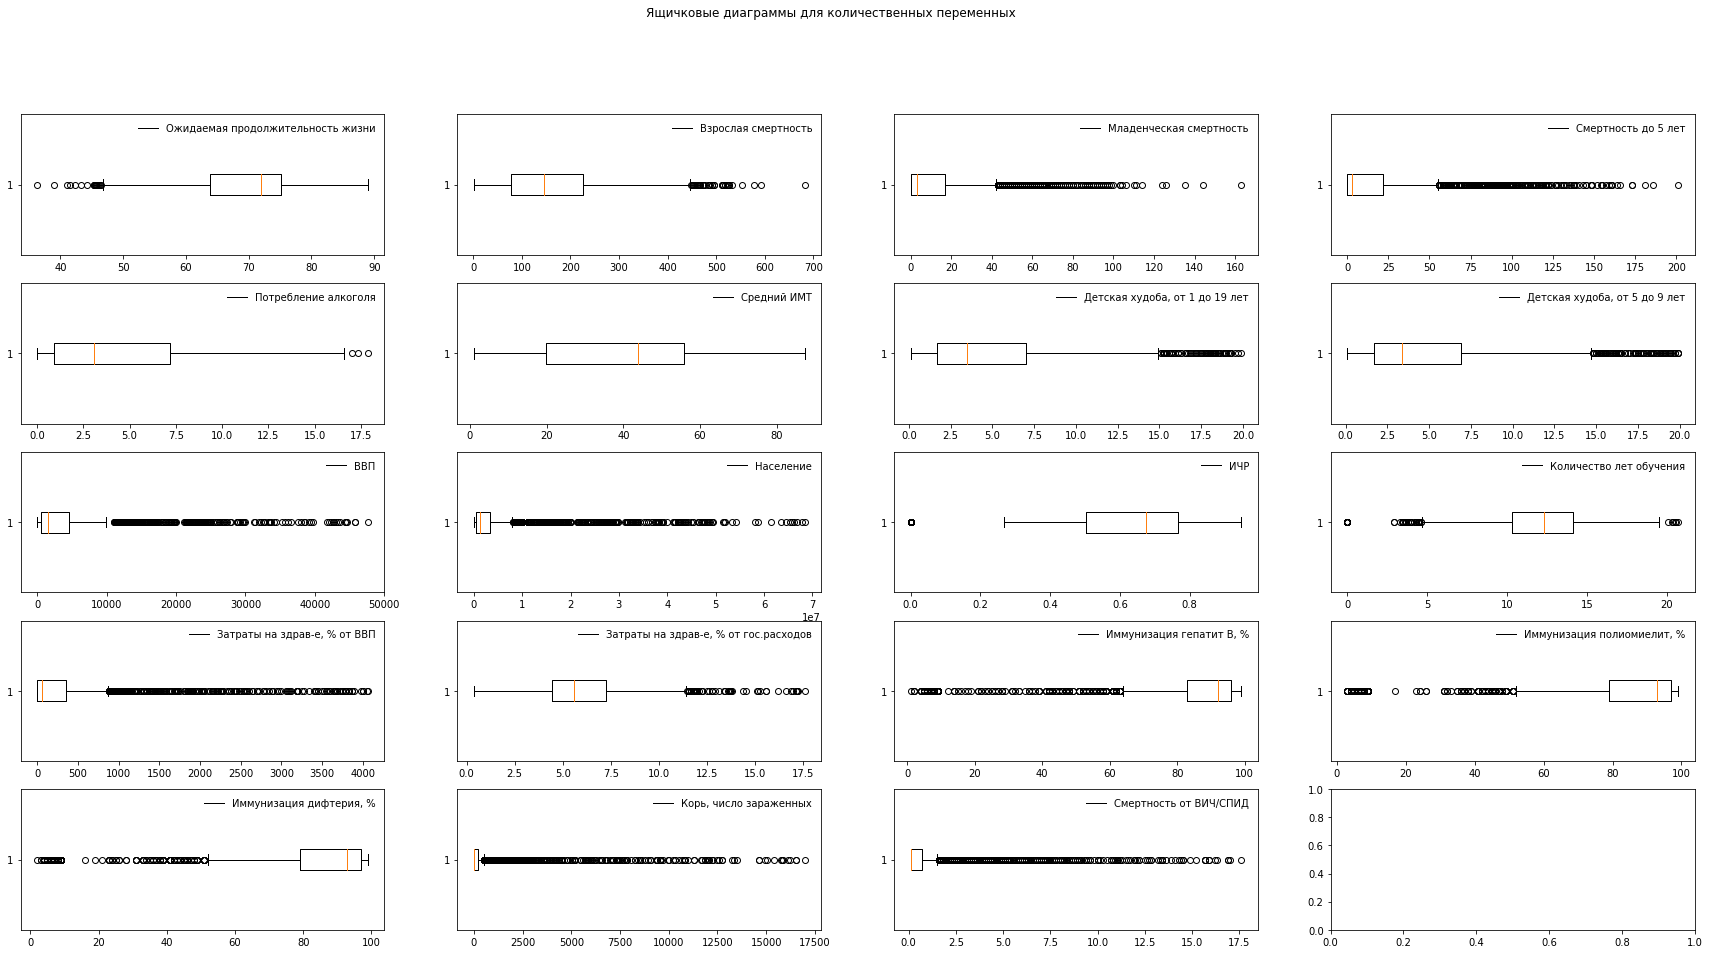

In [224]:
#Восле очистки данных от выбросов строил еще раз графики "ящик с усами" для всех количественных переменных, чтобы визуально оценить отсутствие выбросов.

fig, ax = plt.subplots(5,4, figsize=(30,15))

ax[0][0].boxplot(life_exp['Ожидаемая продолжительность жизни'],vert=False)
ax[0][1].boxplot(life_exp['Взрослая смертность'],vert=False)
ax[0][2].boxplot(life_exp['Младенческая смертность'],vert=False)
ax[0][3].boxplot(life_exp['Смертность до 5 лет'],vert=False)
ax[1][0].boxplot(life_exp['Потребление алкоголя'],vert=False)
ax[1][1].boxplot(life_exp['Средний ИМТ'],vert=False)
ax[1][2].boxplot(life_exp['Детская худоба, от 1 до 19 лет'],vert=False)
ax[1][3].boxplot(life_exp['Детская худоба, от 5 до 9 лет'],vert=False)
ax[2][0].boxplot(life_exp['ВВП'],vert=False)
ax[2][1].boxplot(life_exp['Население'],vert=False)
ax[2][2].boxplot(life_exp['ИЧР'],vert=False)
ax[2][3].boxplot(life_exp['Количество лет обучения'],vert=False)
ax[3][0].boxplot(life_exp['Затраты на здрав-е, % от ВВП'],vert=False)
ax[3][1].boxplot(life_exp['Затраты на здрав-е, % от гос.расходов'],vert=False)
ax[3][2].boxplot(life_exp['Иммунизация гепатит В, %'],vert=False)
ax[3][3].boxplot(life_exp['Иммунизация полиомиелит, %'],vert=False)
ax[4][0].boxplot(life_exp['Иммунизация дифтерия, %'],vert=False)
ax[4][1].boxplot(life_exp['Корь, число зараженных'],vert=False)
ax[4][2].boxplot(life_exp['Смертность от ВИЧ/СПИД'],vert=False)

ax[0][0].legend(['Ожидаемая продолжительность жизни'], frameon=False)
ax[0][1].legend(['Взрослая смертность'], frameon=False)
ax[0][2].legend(['Младенческая смертность'], frameon=False)
ax[0][3].legend(['Смертность до 5 лет'], frameon=False)
ax[1][0].legend(['Потребление алкоголя'], frameon=False)
ax[1][1].legend(['Средний ИМТ'], frameon=False)
ax[1][2].legend(['Детская худоба, от 1 до 19 лет'], frameon=False)
ax[1][3].legend(['Детская худоба, от 5 до 9 лет'], frameon=False)
ax[2][0].legend(['ВВП'], frameon=False)
ax[2][1].legend(['Население'], frameon=False)
ax[2][2].legend(['ИЧР'], frameon=False)
ax[2][3].legend(['Количество лет обучения'], frameon=False)
ax[3][0].legend(['Затраты на здрав-е, % от ВВП'], frameon=False)
ax[3][1].legend(['Затраты на здрав-е, % от гос.расходов'], frameon=False)
ax[3][2].legend(['Иммунизация гепатит В, %'], frameon=False)
ax[3][3].legend(['Иммунизация полиомиелит, %'], frameon=False)
ax[4][0].legend(['Иммунизация дифтерия, %'], frameon=False)
ax[4][1].legend(['Корь, число зараженных'], frameon=False)
ax[4][2].legend(['Смертность от ВИЧ/СПИД'], frameon=False)

fig.suptitle('Ящичковые диаграммы для количественных переменных')

# **4. EDA: описательные статистики, визуализация основных переменных**
##### Поскольку в нашем наборе данных преобладают количественные переменные для удобного наглядного представления данных построим матрицу рассеивания, а также корреляционную матрицу. 

In [225]:
#Выведем основные описательные статистики для количественных переменных
life_exp[num_features].describe()

,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Смертность до 5 лет,Потребление алкоголя,Средний ИМТ,"Детская худоба, от 1 до 19 лет","Детская худоба, от 5 до 9 лет",ВВП,Население,ИЧР,Количество лет обучения,"Затраты на здрав-е, % от ВВП","Затраты на здрав-е, % от гос.расходов","Иммунизация гепатит В, %","Иммунизация полиомиелит, %","Иммунизация дифтерия, %","Корь, число зараженных",Смертность от ВИЧ/СПИД
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,69.325358,161.624006,13.127186,18.573927,4.290721,38.690938,4.681677,4.689865,4369.164972,4.679974e+06,0.624409,11.940938,344.155540,5.912709,83.420111,82.977941,82.720787,703.064785,1.130286
std,8.717116,111.373222,21.446362,31.559324,3.874721,19.821403,3.857169,3.900050,6995.521476,9.435939e+06,0.205638,3.205087,675.007925,2.336029,22.416329,23.266799,23.596805,2132.566442,2.474939
min,36.300000,1.000000,0.000000,0.000000,0.010000,1.000000,0.100000,0.100000,1.681350,3.400000e+01,0.000000,0.000000,0.000000,0.370000,1.000000,3.000000,2.000000,0.000000,0.100000
25%,63.800000,78.000000,0.000000,0.000000,0.900000,19.800000,1.700000,1.700000,560.979104,3.765748e+05,0.504000,10.300000,2.638454,4.450000,83.000000,79.000000,79.000000,0.000000,0.100000
50%,72.000000,146.000000,3.000000,3.000000,3.095000,43.900000,3.500000,3.400000,1534.193045,1.370540e+06,0.676000,12.300000,59.902736,5.580000,92.000000,93.000000,93.000000,9.000000,0.100000
75%,75.200000,226.000000,17.000000,22.000000,7.200000,55.900000,7.000000,6.900000,4648.331810,3.425468e+06,0.767250,14.100000,352.105823,7.250000,96.000000,97.000000,97.000000,204.500000,0.700000
max,89.000000,682.000000,163.000000,201.000000,17.870000,87.300000,19.900000,19.900000,47651.259900,6.841677e+07,0.948000,20.700000,4064.743869,17.600000,99.000000,99.000000,99.000000,16970.000000,17.600000


Сделаем некоторые выводы на основе таблицы с описательными статистиками:
* Средняя ожидаемая продолжительность жизни в мире с период с 2000 по 2015 год составляла 69 лет
* Наименьший показатель был равен 39 лет, а наибольший - 89 лет
* Средний уровень иммунизации против гепатита В, полиомиелита и дифтерии составил 83% 
* Средний индекс человеческого развития по миру составил 62%
* Средний индекс массы тела составил 38.7, что явялется довольно-таки высоким показателем, выше нормы.

Построим различные графики ожидаемой продолжительности жизни в разрезе временных периодов, стран, а также уровня развития регионов.

In [226]:
#Расчитаем среднюю ожидаемую продолжительность жизни по годам с 2000 по 2015 гг. 
life_exp_mean = life_exp.groupby(life_exp['Год'])['Ожидаемая продолжительность жизни'].mean()
life_exp_mean

Год
2000    67.978808
2001    68.268421
2002    68.508917
2003    68.657419
2004    67.658389
2005    68.301316
2006    68.672436
2007    68.796129
2008    68.784416
2009    69.987261
2010    69.562420
2011    69.989937
2012    70.226250
2013    70.754335
2014    70.816875
2015    71.633728
Name: Ожидаемая продолжительность жизни, dtype: float64

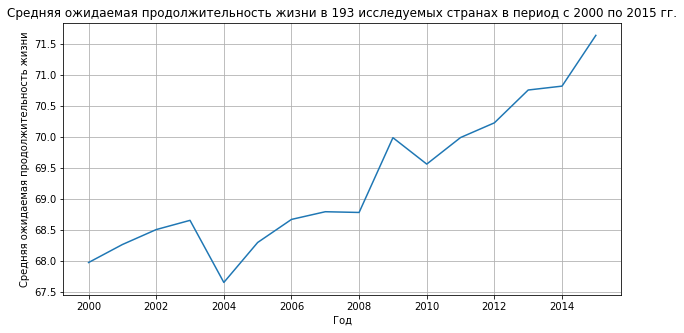

In [227]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(life_exp_mean)

ax.set_xlabel('Год')
ax.set_ylabel('Средняя ожидаемая продолжительность жизни')
ax.set_title('Средняя ожидаемая продолжительность жизни в 193 исследуемых странах в период с 2000 по 2015 гг.')

ax.grid(True);

Видим, что, начиная с 2000 года и по 2015 год, ожидаемая продолжительность жизни в среднем росла во всем мире. Однако, в 2004 году было небольшое падение в значении показателя, вероятно вызванное нестадильностьюю мировой экономики после 1990-х годов. 

---
Построим карту мира с нанесенным средним значением ожидаемой продолжительности жизни для каждой из 193 стран в наиболее близком в настоящему 2015 году. 

In [228]:
life_exp_2015 = life_exp[life_exp['Год'] == 2015]

In [229]:
trace0 = go.Choropleth(z = life_exp_2015['Ожидаемая продолжительность жизни'],
                       locations = life_exp_2015['Страна'],
                      locationmode = 'country names', 
                      colorbar_title = "Ожидаемая продолжительность жизни в 2015 году")

fig = go.Figure(data = trace0)
fig

Видим, что наиболее низкий уровень ожидаемой продолжительности жизни в 2015 году отмечается в странах центральной Африки в таких странах, как:
* Сьерра-Леоне - 51 год
* Ангола - 52 года
* Чад - 53 года

Наиболее высокий показатель ожидаемой продолжительности жизни заметен в странах Европы, Чили, а также в Канаде:
* Словения - 88 лет
* Дания - 86 лет
* Чили - 85 лет

Средний уровень показателя ожидаемой продолжительности жизни присутствует в большинстве оставшихся стран: странах Азии, центральной Европы, Латинской Америке, Северной Америке. 

В России в 2015 году средняя продолжительность жизни составляла 75 лет.

In [230]:
life_exp_max = life_exp.groupby(life_exp['Страна'])['Ожидаемая продолжительность жизни'].mean().sort_values()
life_exp_max


Страна
Sierra Leone                46.112500
Central African Republic    48.512500
Angola                      49.018750
Côte d'Ivoire               50.387500
Chad                        50.546667
                              ...    
Norway                      82.040000
Iceland                     82.816667
Japan                       83.128571
Switzerland                 84.200000
Germany                     86.500000
Name: Ожидаемая продолжительность жизни, Length: 187, dtype: float64

---
Построим линейные графики временных трендов роста целевого показателя ожидаемой продолжительности жизни для всех стран

In [231]:
#Выведем частотную таблицу для стран в датасете
life_exp['Страна'].value_counts().to_frame()

,Страна
Afghanistan,16
Panama,16
Montenegro,16
Morocco,16
Myanmar,16
...,...
Marshall Islands,1
Saint Kitts and Nevis,1
San Marino,1
Tuvalu,1


In [232]:
life_exp_country_av = life_exp.groupby(['Год', 'Страна'])['Ожидаемая продолжительность жизни'].mean()

life_exp_2000 = pd.DataFrame(life_exp_country_av.loc[2000])
life_exp_2001 = pd.DataFrame(life_exp_country_av.loc[2001])
life_exp_2002 = pd.DataFrame(life_exp_country_av.loc[2002])
life_exp_2003 = pd.DataFrame(life_exp_country_av.loc[2003])
life_exp_2004 = pd.DataFrame(life_exp_country_av.loc[2004])
life_exp_2005 = pd.DataFrame(life_exp_country_av.loc[2005])
life_exp_2006 = pd.DataFrame(life_exp_country_av.loc[2006])
life_exp_2007 = pd.DataFrame(life_exp_country_av.loc[2007])
life_exp_2008 = pd.DataFrame(life_exp_country_av.loc[2008])
life_exp_2009 = pd.DataFrame(life_exp_country_av.loc[2009])
life_exp_2010 = pd.DataFrame(life_exp_country_av.loc[2010])
life_exp_2011 = pd.DataFrame(life_exp_country_av.loc[2011])
life_exp_2012 = pd.DataFrame(life_exp_country_av.loc[2012])
life_exp_2013 = pd.DataFrame(life_exp_country_av.loc[2013])
life_exp_2014 = pd.DataFrame(life_exp_country_av.loc[2014])
life_exp_2015 = pd.DataFrame(life_exp_country_av.loc[2015])

life_exp_2000.rename(columns = {'Ожидаемая продолжительность жизни': '2000'}, inplace = True)
life_exp_2001.rename(columns = {'Ожидаемая продолжительность жизни': '2001'}, inplace = True)
life_exp_2002.rename(columns = {'Ожидаемая продолжительность жизни': '2002'}, inplace = True)
life_exp_2003.rename(columns = {'Ожидаемая продолжительность жизни': '2003'}, inplace = True)
life_exp_2004.rename(columns = {'Ожидаемая продолжительность жизни': '2004'}, inplace = True)
life_exp_2005.rename(columns = {'Ожидаемая продолжительность жизни': '2005'}, inplace = True)
life_exp_2006.rename(columns = {'Ожидаемая продолжительность жизни': '2006'}, inplace = True)
life_exp_2007.rename(columns = {'Ожидаемая продолжительность жизни': '2007'}, inplace = True)
life_exp_2008.rename(columns = {'Ожидаемая продолжительность жизни': '2008'}, inplace = True)
life_exp_2009.rename(columns = {'Ожидаемая продолжительность жизни': '2009'}, inplace = True)
life_exp_2010.rename(columns = {'Ожидаемая продолжительность жизни': '2010'}, inplace = True)
life_exp_2011.rename(columns = {'Ожидаемая продолжительность жизни': '2011'}, inplace = True)
life_exp_2012.rename(columns = {'Ожидаемая продолжительность жизни': '2012'}, inplace = True)
life_exp_2013.rename(columns = {'Ожидаемая продолжительность жизни': '2013'}, inplace = True)
life_exp_2014.rename(columns = {'Ожидаемая продолжительность жизни': '2014'}, inplace = True)
life_exp_2015.rename(columns = {'Ожидаемая продолжительность жизни': '2015'}, inplace = True)

life_exp_country_av_df = pd.concat([life_exp_2000, life_exp_2001, life_exp_2002,life_exp_2003, life_exp_2004, life_exp_2005, 
                                    life_exp_2006, life_exp_2007, life_exp_2008, life_exp_2009, life_exp_2010,
                                    life_exp_2011, life_exp_2012, life_exp_2013, life_exp_2014, life_exp_2015], axis=1)
life_exp_country_av_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Страна,,,,,,,,,,,,,,,,
Afghanistan,54.8,55.3,56.2,56.7,57.0,57.3,57.3,57.5,58.1,58.6,58.8,59.2,59.5,59.9,59.9,65.0
Albania,72.6,73.6,73.3,72.8,73.0,73.5,74.2,75.9,75.3,76.1,76.2,76.6,76.9,77.2,77.5,77.8
Algeria,71.3,71.4,71.6,71.7,72.3,72.9,73.4,73.8,74.1,74.4,74.7,74.9,75.1,75.3,75.4,75.6
Angola,45.3,45.7,46.5,46.8,47.1,47.4,47.7,48.2,48.7,49.1,49.6,51.0,56.0,51.1,51.7,52.4
Antigua and Barbuda,73.6,73.8,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.7,75.9,76.1,76.2,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN
Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN
Saint Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN


In [233]:
#Удаляем страны, в значении целевой переменной которых есть хотя бы 1 пропуск, для более корректного построения графика временной динамики ожидаемой продолжительности жизни в различных странах
#Получаем, что 120 из 193 стран содержат данные о целевой переменной за все года в период с 2000 по 2015 гг. 
life_exp_country_av_df = life_exp_country_av_df.dropna()
life_exp_country_av_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Страна,,,,,,,,,,,,,,,,
Afghanistan,54.8,55.3,56.2,56.7,57.0,57.3,57.3,57.5,58.1,58.6,58.8,59.2,59.5,59.9,59.9,65.0
Albania,72.6,73.6,73.3,72.8,73.0,73.5,74.2,75.9,75.3,76.1,76.2,76.6,76.9,77.2,77.5,77.8
Algeria,71.3,71.4,71.6,71.7,72.3,72.9,73.4,73.8,74.1,74.4,74.7,74.9,75.1,75.3,75.4,75.6
Angola,45.3,45.7,46.5,46.8,47.1,47.4,47.7,48.2,48.7,49.1,49.6,51.0,56.0,51.1,51.7,52.4
Antigua and Barbuda,73.6,73.8,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.7,75.9,76.1,76.2,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,67.1,67.4,67.1,67.2,67.8,67.3,67.6,67.8,67.9,68.0,68.3,68.5,68.8,69.1,69.2,69.4
Vanuatu,69.0,69.1,69.3,69.4,69.6,69.9,71.0,73.0,75.0,78.0,71.0,71.2,71.4,71.6,71.7,72.0
Venezuela (Bolivarian Republic of),72.5,72.5,73.1,72.4,73.3,73.6,73.6,73.4,73.2,73.6,73.7,73.8,73.7,73.8,73.9,74.1


In [234]:
life_exp_country_av_df_t = pd.DataFrame(life_exp_country_av_df)
life_exp_country_av_df_t = life_exp_country_av_df_t.T

In [235]:
life_exp_country_av_df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2000 to 2015
Columns: 120 entries, Afghanistan to Yemen
dtypes: float64(120)
memory usage: 15.7+ KB


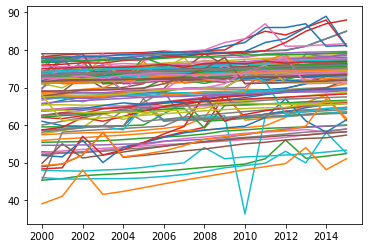

In [236]:
#Построим линейные графики для временных рядов для переменной ожидаемой продолжительности жизни для 120 стран 
#Общий тренд в период с 2000 по 2015 гг. - рост показателя в большинстве стран
life_exp_country_av_df_t[life_exp_country_av_df_t.columns[1:121]].plot(legend=None)


Построим временные ряды для выборочных стран мира:
* Топ-страны: Словения
* Средний уровень: Россия
* Отстающие: Ангола

Также добавим на график два бенчмарка - средняя ожидаемая продолжительность жизни в развивающихся и развитых странах. 

In [237]:
life_exp_developed = life_exp[life_exp['Статус'] == 'Developed']
life_exp_developing = life_exp[life_exp['Статус'] == 'Developing']

life_exp_developed_mean = life_exp_developed.groupby(['Год'])['Ожидаемая продолжительность жизни'].mean()
life_exp_developing_mean = life_exp_developing.groupby(['Год'])['Ожидаемая продолжительность жизни'].mean()

gapminder_developed_list = pd.concat([life_exp_developed_mean], axis=1)
gapminder_developing_list = pd.concat([life_exp_developing_mean], axis=1)

gapminder_developed_list["Год"] = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
gapminder_developing_list["Год"] = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [238]:
gapminder_rus = life_exp[life_exp['Страна'] == 'Russian Federation']
gapminder_ang = life_exp[life_exp['Страна'] == 'Angola']
gapminder_slo = life_exp[life_exp['Страна'] == 'Slovenia']

In [239]:
trace1 = go.Scatter(x=gapminder_rus['Год'],
                    y=gapminder_rus['Ожидаемая продолжительность жизни'],
                    name='Россия')

trace2 = go.Scatter(x=gapminder_ang['Год'],
                    y=gapminder_ang['Ожидаемая продолжительность жизни'],
                    name='Ангола')

trace3 = go.Scatter(x=gapminder_slo['Год'],
                    y=gapminder_slo['Ожидаемая продолжительность жизни'],
                    name='Словения')

trace4 = go.Scatter(x=gapminder_developed_list['Год'],
                    y=gapminder_developed_list['Ожидаемая продолжительность жизни'],
                    name='Развитые страны')

trace5 = go.Scatter(x=gapminder_developing_list['Год'],
                    y=gapminder_developing_list['Ожидаемая продолжительность жизни'],
                    name='Развивающиеся страны')

layout = go.Layout(title='Ожидаемая продолжительность жизни в странах высоким, средним и низким уровнем показателя в период с 2000 по 2015 гг.',
                  yaxis={'range':[0,100]})

fig = go.Figure(data = [trace1, trace2, trace3, trace4, trace5], layout = layout)
fig

Из сравнительного графика более точно видно различие в среднем уровне ожидаемой продолжительности жизни в странах мира. 
Два выделенных на графике бенчмарка средней ожидаемой продолжительности жизни для развитых и развивающихся стран отчетливо показывают положение показателя в рассматриваемый период в разрезе стран.
Так, например, лидер по показателю (Словения) находится на уровне среднего показателя в развитых странах (80 лет), в то время как Россия держится на уровне показателя развивающихся стран (68 лет). На более низком уровне находятся отстающие страны с наиболее низким показателем (от 48 до 68 лет).

---
Перейдем к корреляционному анализу. 


In [240]:
#Расчитываем коэффициенты корреляции
correlation = life_exp.corr().loc[num_features, num_features]

Строим корреляционную матрицу для всех количественных переменных

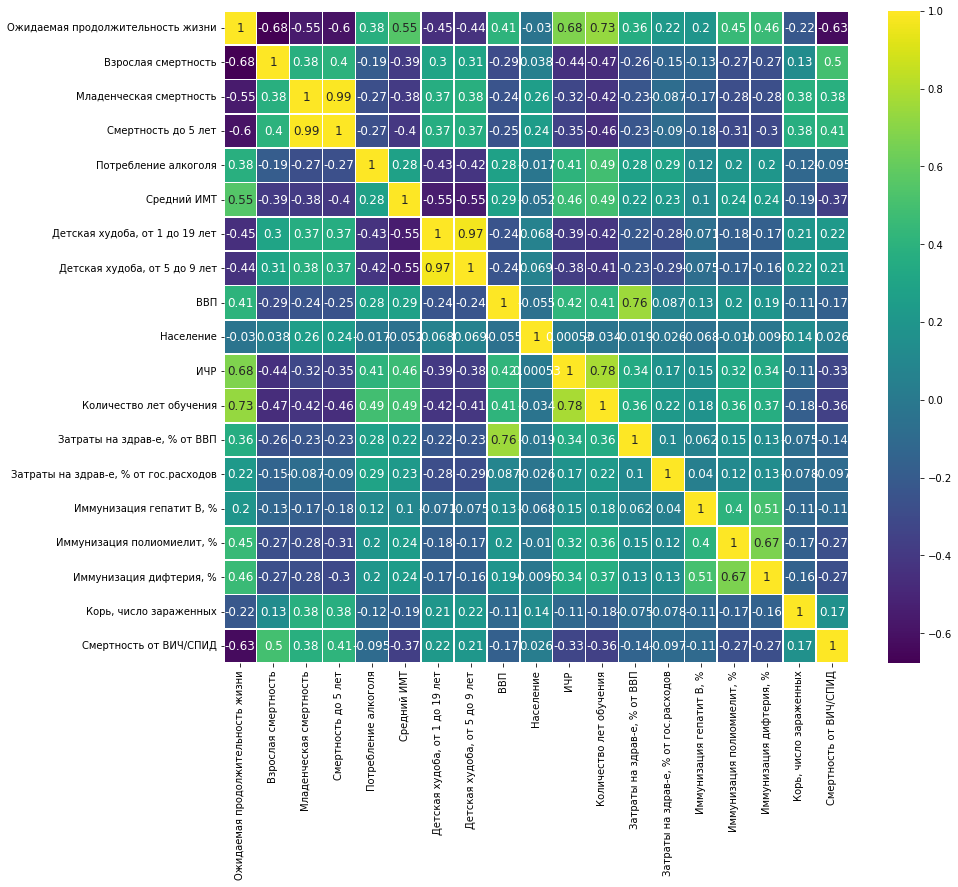

In [241]:
#Строим корреляционную матрицу
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Наибольшая прямая взаимосвязь по модулю наблюдается со следующими переменными:
* Количество лет обучения = 0.73
* ИЧР = 0.68
* Взрослая смертность = -0.68
* Смертность от ВИЧ/СПИД = -0.63
* Смертность до 5 лет = -0.60
* Средний ИМТ = 0.55

Будем использовать данную информацию при построении будущей регрессионной модели.

In [242]:
#Выведем коэффициенты корреляции для взаимосвязей между зависимой переменной
correlation.abs().unstack().sort_values()
correlation_df = pd.DataFrame(correlation)


correlation_df.sort_values(['Ожидаемая продолжительность жизни'], ascending=[False])

,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Смертность до 5 лет,Потребление алкоголя,Средний ИМТ,"Детская худоба, от 1 до 19 лет","Детская худоба, от 5 до 9 лет",ВВП,Население,ИЧР,Количество лет обучения,"Затраты на здрав-е, % от ВВП","Затраты на здрав-е, % от гос.расходов","Иммунизация гепатит В, %","Иммунизация полиомиелит, %","Иммунизация дифтерия, %","Корь, число зараженных",Смертность от ВИЧ/СПИД
Ожидаемая продолжительность жизни,1.000000,-0.677184,-0.554227,-0.597151,0.383416,0.548993,-0.450448,-0.441204,0.406971,-0.029989,0.677853,0.732666,0.364296,0.222355,0.195536,0.452428,0.457134,-0.221843,-0.628172
Количество лет обучения,0.732666,-0.465783,-0.423131,-0.455383,0.492565,0.492550,-0.421291,-0.411787,0.412666,-0.034451,0.777977,1.000000,0.356491,0.224077,0.175603,0.362560,0.369043,-0.177339,-0.355079
ИЧР,0.677853,-0.441388,-0.319348,-0.349532,0.410151,0.464167,-0.389863,-0.381400,0.418556,0.000532,1.000000,0.777977,0.344449,0.168128,0.148721,0.323860,0.340265,-0.112708,-0.328495
Средний ИМТ,0.548993,-0.386718,-0.382913,-0.403848,0.281556,1.000000,-0.545993,-0.549624,0.285320,-0.052130,0.464167,0.492550,0.221478,0.225964,0.099819,0.242315,0.242397,-0.188647,-0.365467
"Иммунизация дифтерия, %",0.457134,-0.269039,-0.276532,-0.304418,0.201094,0.242397,-0.167974,-0.163019,0.188295,-0.009476,0.340265,0.369043,0.130364,0.129552,0.506242,0.668367,1.000000,-0.157976,-0.274671
"Иммунизация полиомиелит, %",0.452428,-0.271432,-0.281372,-0.307852,0.200060,0.242315,-0.176755,-0.166543,0.199749,-0.010254,0.323860,0.362560,0.145080,0.115078,0.402676,1.000000,0.668367,-0.168409,-0.268405
ВВП,0.406971,-0.291438,-0.243757,-0.246490,0.283231,0.285320,-0.238693,-0.243320,1.000000,-0.055192,0.418556,0.412666,0.757186,0.087233,0.126386,0.199749,0.188295,-0.105550,-0.170626
Потребление алкоголя,0.383416,-0.186849,-0.274533,-0.268725,1.000000,0.281556,-0.430077,-0.421152,0.283231,-0.016893,0.410151,0.492565,0.277752,0.293510,0.116064,0.200060,0.201094,-0.118512,-0.095499
"Затраты на здрав-е, % от ВВП",0.364296,-0.256344,-0.229161,-0.227410,0.277752,0.221478,-0.224929,-0.227933,0.757186,-0.019479,0.344449,0.356491,1.000000,0.102827,0.062417,0.145080,0.130364,-0.075413,-0.140362
"Затраты на здрав-е, % от гос.расходов",0.222355,-0.145788,-0.087415,-0.089849,0.293510,0.225964,-0.277984,-0.285750,0.087233,-0.026338,0.168128,0.224077,0.102827,1.000000,0.040450,0.115078,0.129552,-0.078376,-0.096589


Построим отдельную корреляционную матрицу для факторов здоровья

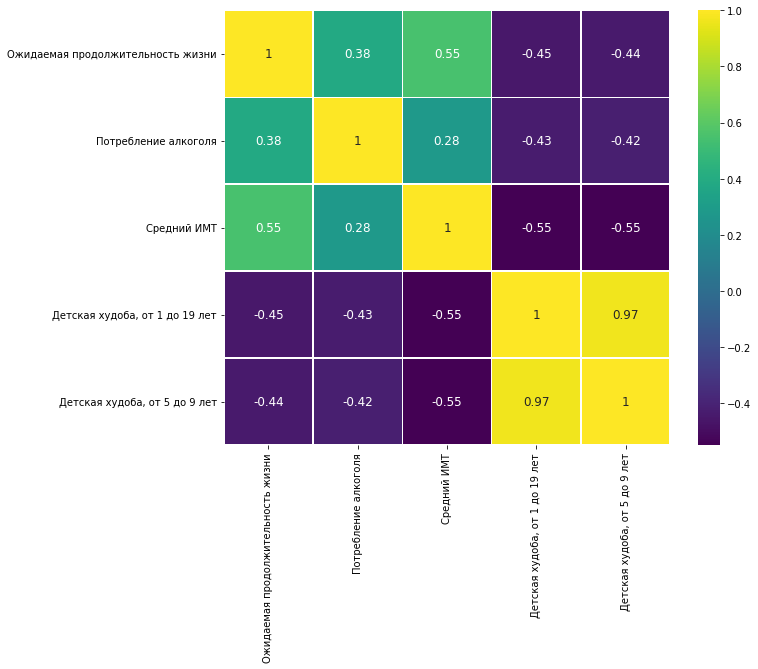

In [243]:
#Расчитываем коэффициенты корреляции для отдельных групп факторов в датасете для более наглядной визуализации 
correlation_health = life_exp.corr().loc[health_features, health_features]

fig , ax = plt.subplots(figsize = (10,8))

sns.heatmap(correlation_health, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Построим отдельную корреляционную матрицу для факторов иммунизации

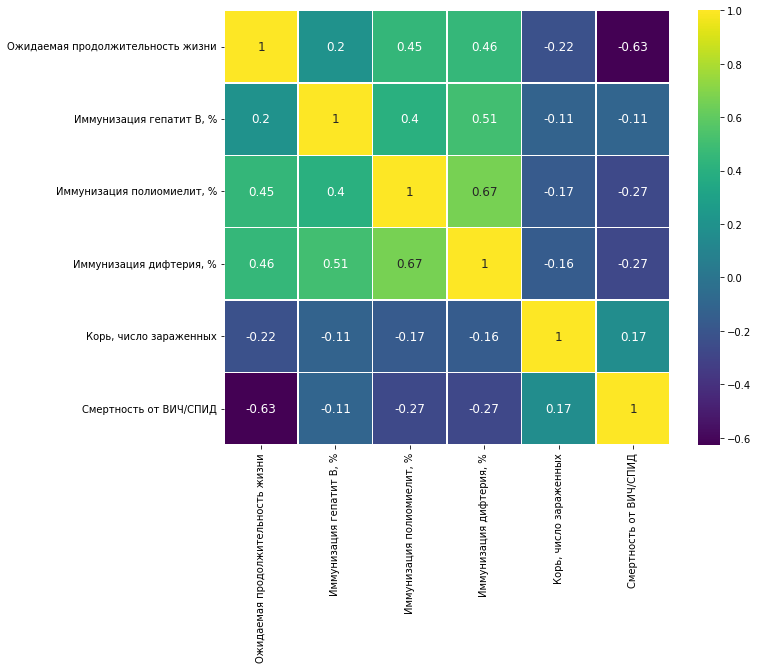

In [244]:
#Расчитываем коэффициенты корреляции для отдельных групп факторов в датасете для более наглядной визуализации 
correlation_immun = life_exp.corr().loc[immun_features, immun_features]

fig , ax = plt.subplots(figsize = (10,8))

sns.heatmap(correlation_immun, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Построим отдельную корреляционную матрицу для экономических факторов

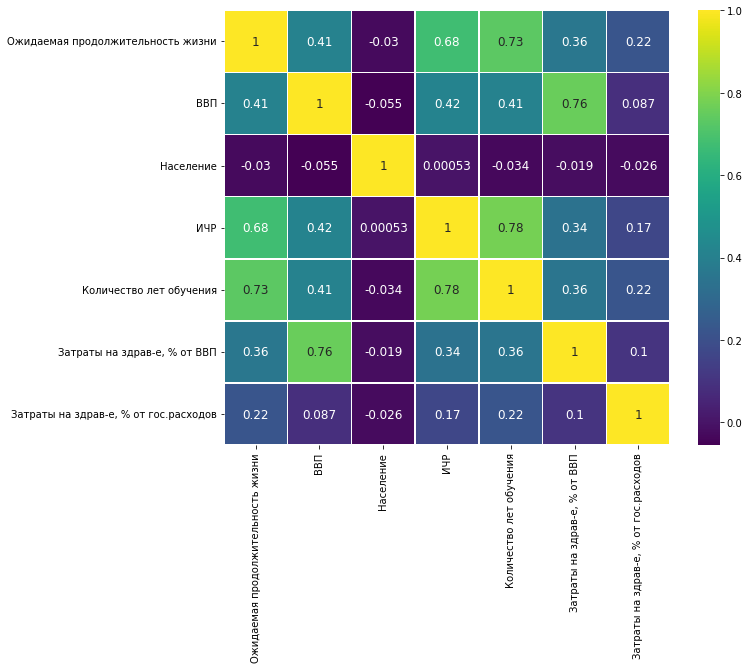

In [245]:
#Расчитываем коэффициенты корреляции для отдельных групп факторов в датасете для более наглядной визуализации 
correlation_econ = life_exp.corr().loc[econ_features, econ_features]

fig , ax = plt.subplots(figsize = (10,8))

sns.heatmap(correlation_econ, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Построим отдельную корреляционную матрицу для факторов смертности

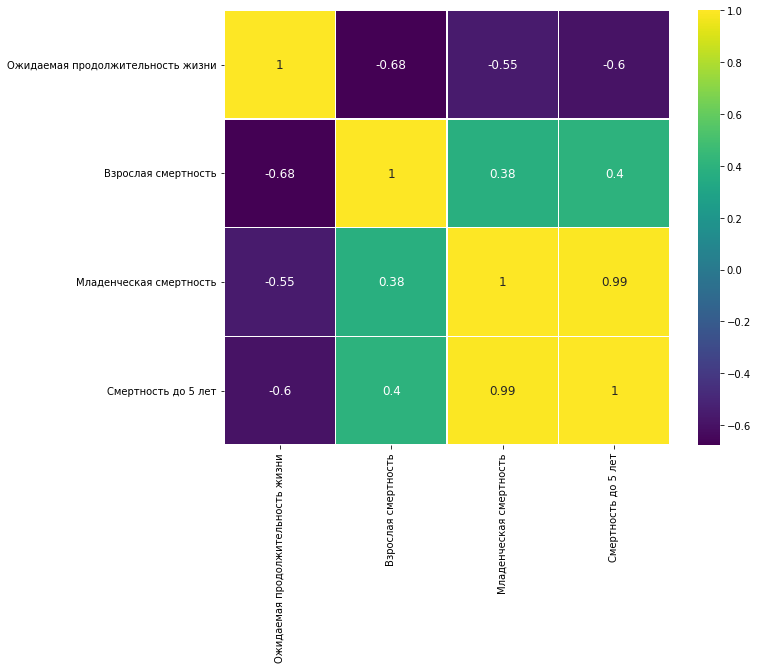

In [246]:
#Расчитываем коэффициенты корреляции для отдельных групп факторов в датасете для более наглядной визуализации 
correlation_mortal = life_exp.corr().loc[mortal_features, mortal_features]

fig , ax = plt.subplots(figsize = (10,8))

sns.heatmap(correlation_mortal, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Из построенных корреляционных матриц видно, что некоторые независимые переменные обладают мультиколлинеарностью. Так, например, мультиколлинерностью обладают переменные ВВП и общих затрат на здравоохранение, смертность до 5 лет и младенческая смертность, количество лет обучения и ИЧР, детская худоба от 1 до 19 лет и от 5 до 9 лет. Было принято решение оставить только те переменные, которые обладают наименьшей мультиколлинеарностью и с другими переменными. 

Таким образом, мы удалили следующие переменные из датафрейма:
* Затраты на здравоохранение (% от ВВП)
* Смертность до 5 лет
* Детская худоба от 5 до 9
* Количество лет обучения
---



Построим графики рассеивания (также по группах количественных данных) а разрезе статуса развития стран. В начале строим графики для факторов здоровья.

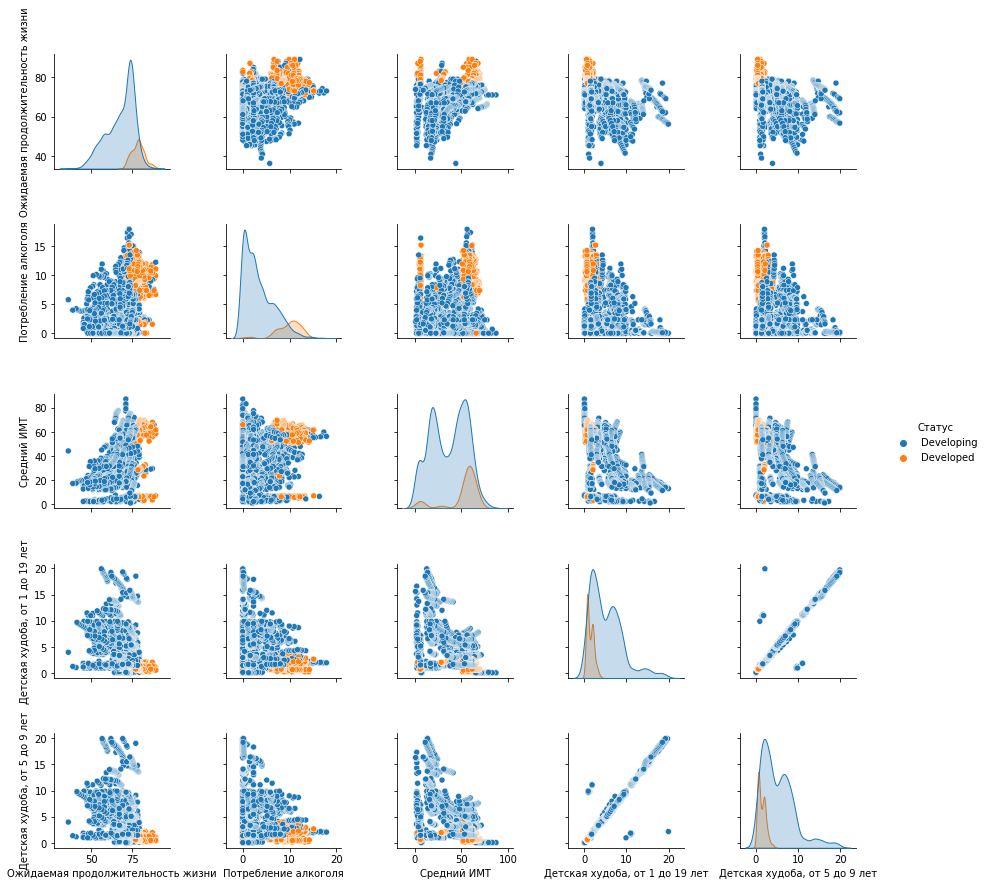

In [247]:
# Построим графики рассеивания для экономических факторов и зависимой переменной ожидаемой продолжительности жизни
sns.pairplot(life_exp[health_features_status], hue='Статус')
#Отметим наличие прямой корреляции между показателями худобы, один из данных показателей небходимо будет исключить при построении регрессионной модели

Построим графики рассеивания для факторов смертности

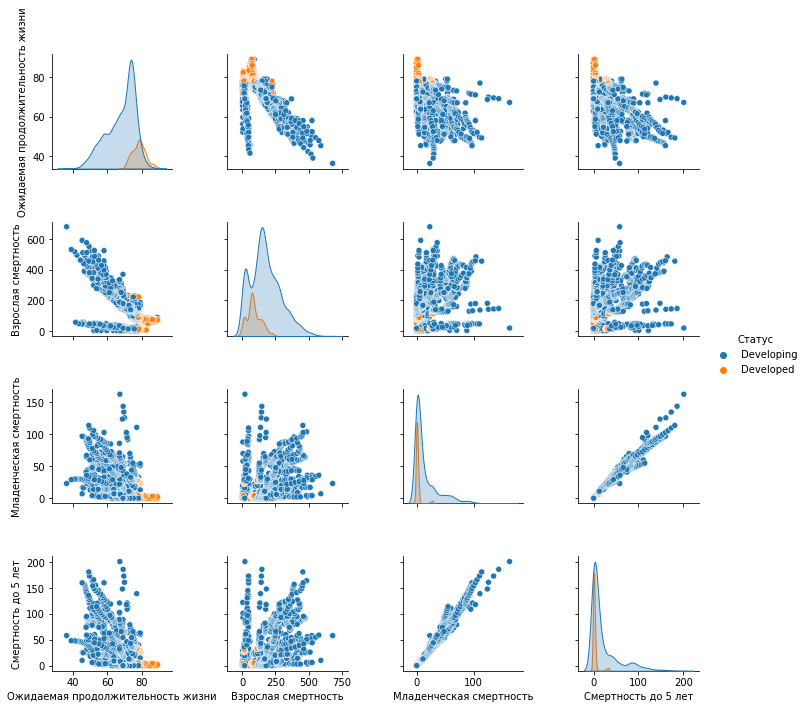

In [248]:
# Построим графики рассеивания для факторов смертности и зависимой переменной ожидаемой продолжительности жизни
sns.pairplot(life_exp[mortal_features_status], hue='Статус')
#Отметим наличие прямой корреляции между показателями младенческой смертности и смертности до 5 лет

Построим графики для экономических факторов 

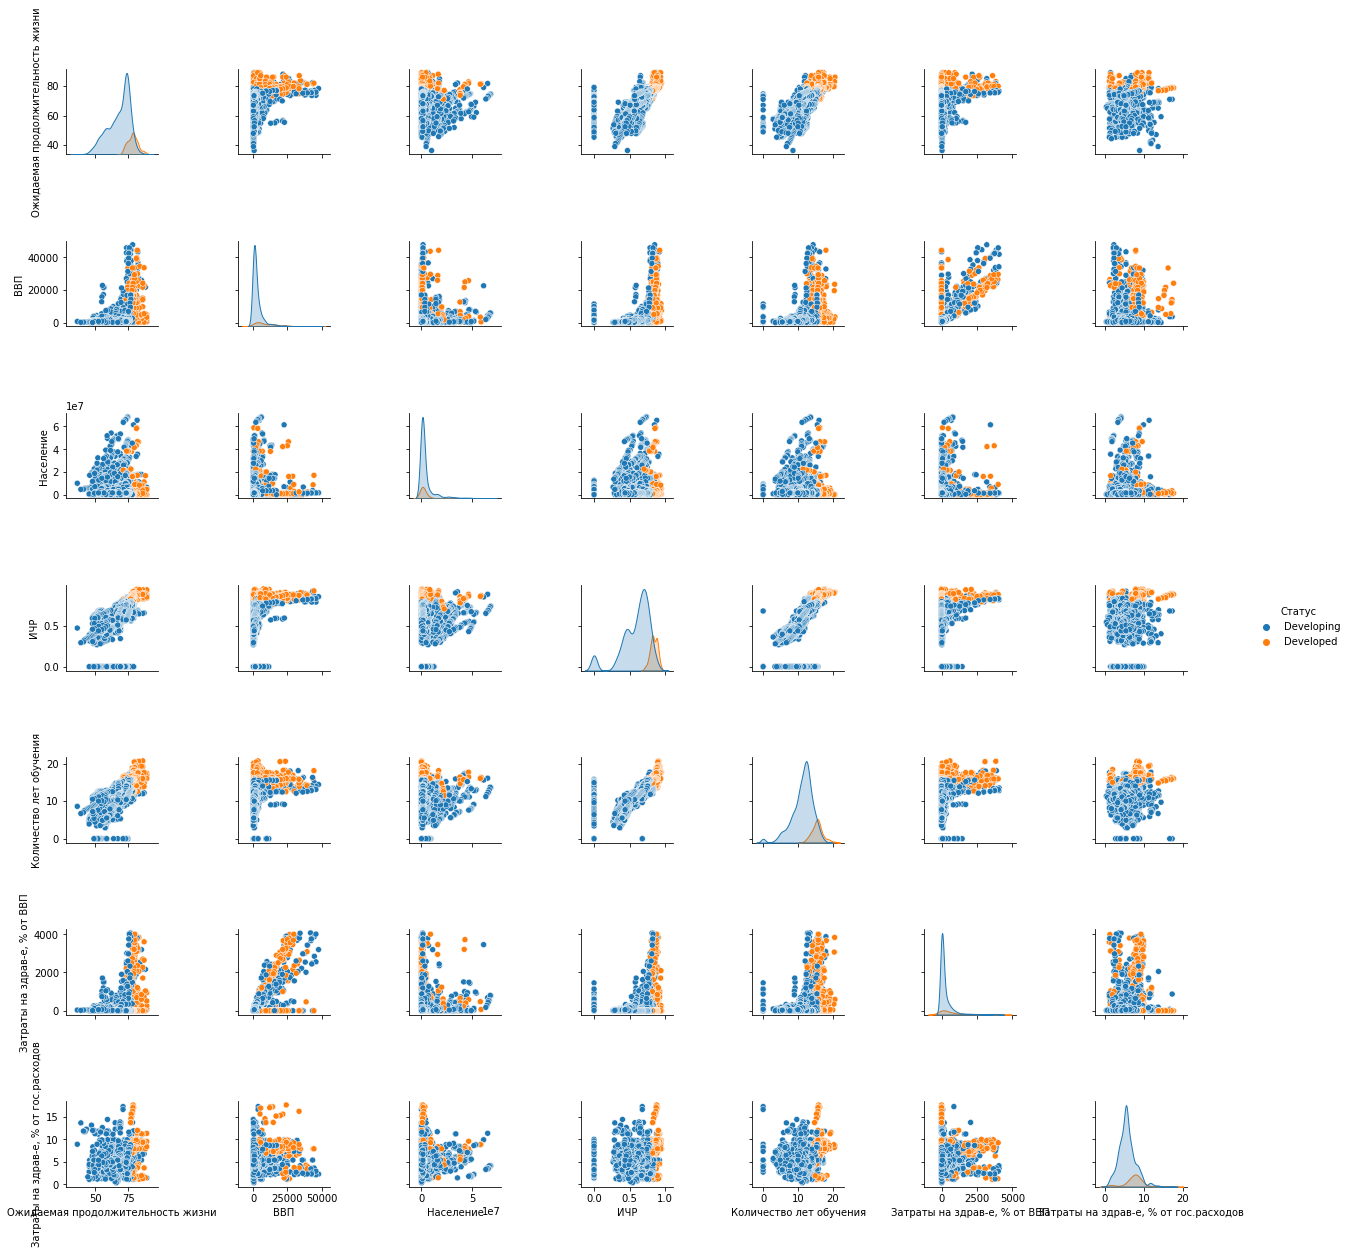

In [249]:
# Построим графики рассеивания для экономических факторов и зависимой переменной ожидаемой продолжительности жизни
sns.pairplot(life_exp[econ_features_status], hue='Статус')
#Наиболее явно выраженная прямая зависимость наблюдается между переменными ИЧР и кол-вом лет обучения, что логично.

Построим графики для факторов иммунизации

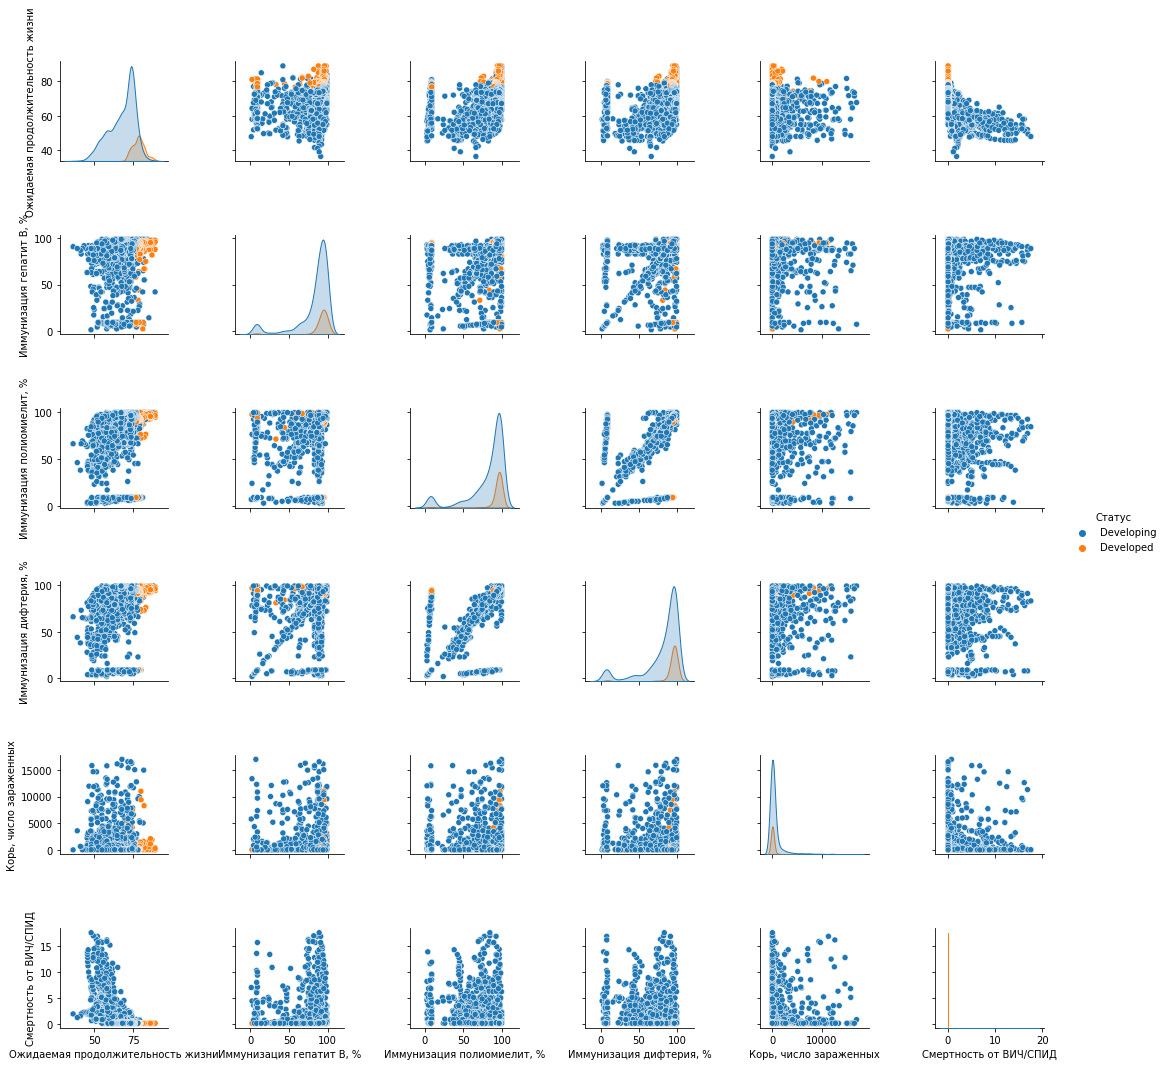

In [250]:
# Построим графики рассеивания для экономических факторов и зависимой переменной ожидаемой продолжительности жизни
sns.pairplot(life_exp[immun_features_status], hue='Статус')
# На графике присутсвует корреляция показателей иммунизации от дифтерии и полиомиелита

In [251]:
#Удаляем из датасета переменные, обладающие сильной корреляцией между иными переменными в датасете. 
#Удаляем затраты на здравоохранение от ВВП, Смертность до 5 лет, Количество лет обучения, детская худоба от 5 до 9 лет.
life_exp.drop(life_exp.columns[[7,11,19,21]], axis = 1, inplace = True)
life_exp

,Страна,Год,Статус,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Потребление алкоголя,"Иммунизация гепатит В, %","Корь, число зараженных",Средний ИМТ,"Иммунизация полиомиелит, %","Затраты на здрав-е, % от гос.расходов","Иммунизация дифтерия, %",Смертность от ВИЧ/СПИД,ВВП,Население,"Детская худоба, от 1 до 19 лет",ИЧР
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,91.0,0,31.3,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,0.498
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,95.0,0,3.8,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,0.488
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,97.0,0,3.3,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,0.464
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,94.0,0,29.9,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,0.452


In [252]:
num_features_del = ['Ожидаемая продолжительность жизни', 
                'Взрослая смертность', 'Младенческая смертность',  
                'Потребление алкоголя', 'Средний ИМТ', 'Детская худоба, от 1 до 19 лет',  
                'ВВП', 'Население', 'ИЧР', 'Затраты на здрав-е, % от гос.расходов', 
                'Иммунизация гепатит В, %', 'Иммунизация полиомиелит, %', 'Иммунизация дифтерия, %', 'Корь, число зараженных', 'Смертность от ВИЧ/СПИД']

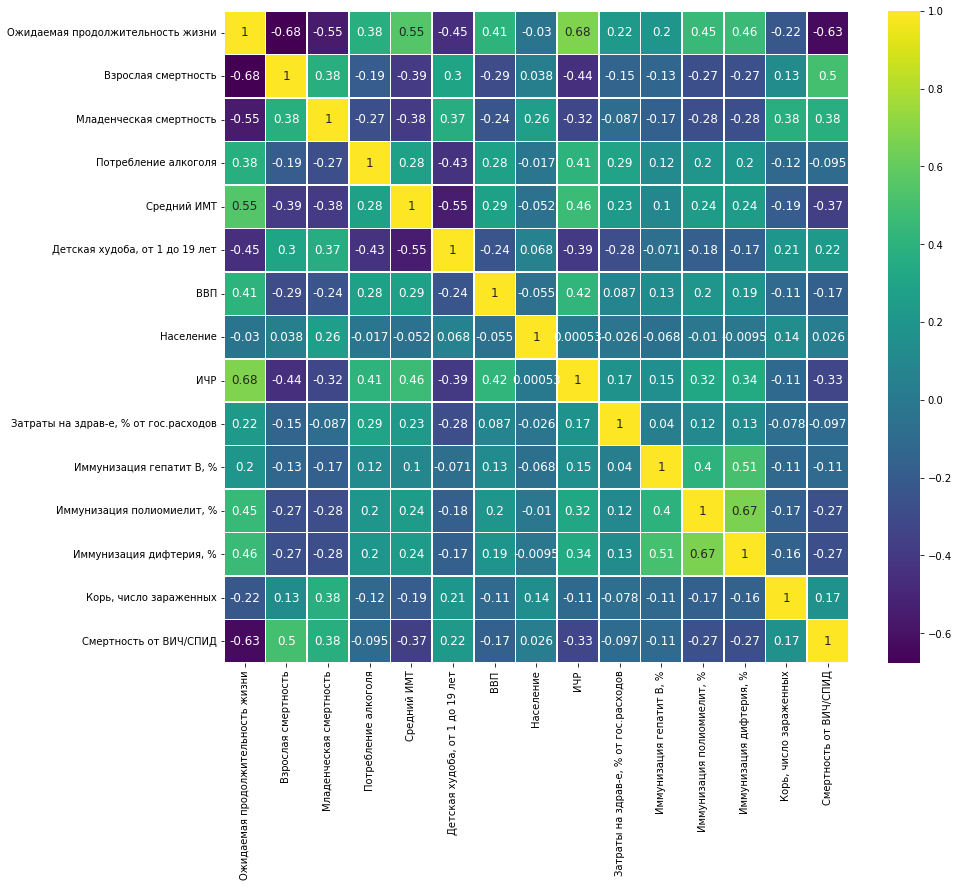

In [253]:
correlation_del = life_exp.corr().loc[num_features_del, num_features_del]
#Строим корреляционную матриц
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation_del, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Заметим, что после удаления мультиколлинеарных переменных из датасета, новые мультиколлинеарные взаимосвязи не появились. 
Отметим, что среди оставшихся переменных заметны следующие зависимости:
* Индекс человеческого развития напрямую влияет на ожидаемую продолжительность жизни
* Также, отметим, что чем выше средняя масса тела у населения, тем выше ожидаемая продолжительность жизни 
* Показатель смертности взрослого населения снижает показатель ожидаемой продолжительности жизни
* Количество зараженных корью сильно коррелирует с младенческой смертью, можно сделать вывод о том, что срежи детей больше случае летального исхода от кори, нежели среди взрослого населения 
* При этом среди взрослого населения отмечается взаимосвязь между смерностью и смерностью по причине заражения ВИЧ/СПИД.
* Присутствует значительная прямая взаимосвязь между иммунизацией от дифтерии и полиомиелита

In [254]:
life_exp_value_mean=life_exp.groupby('Страна')['Ожидаемая продолжительность жизни'].mean()
life_exp_mortality_mean=life_exp.groupby('Страна')['Взрослая смертность'].mean()
life_exp_bmi=life_exp.groupby('Страна')['Средний ИМТ'].mean()
life_exp_icr=life_exp.groupby('Страна')['ИЧР'].mean()

life_exp_concat = pd.concat([life_exp_value_mean, life_exp_mortality_mean, life_exp_bmi, life_exp_icr], axis=1)
life_exp_concat

,Ожидаемая продолжительность жизни,Взрослая смертность,Средний ИМТ,ИЧР
Страна,,,,
Afghanistan,58.193750,269.0625,15.518750,0.415375
Albania,75.156250,45.0625,49.068750,0.709875
Algeria,73.618750,108.1875,48.743750,0.694875
Angola,49.018750,328.5625,18.018750,0.458375
Antigua and Barbuda,75.056250,127.5000,38.425000,0.488625
...,...,...,...,...
Venezuela (Bolivarian Republic of),73.387500,163.0000,54.487500,0.726812
Viet Nam,74.775000,126.5625,11.187500,0.627062
Yemen,63.862500,211.8125,33.487500,0.475500


Text(0.5, 1.0, 'Зависимость ожидаемой продолжительности жизни от индекса массы тела, индекса человеческого развития, а также взрослой смертности (по странам)')

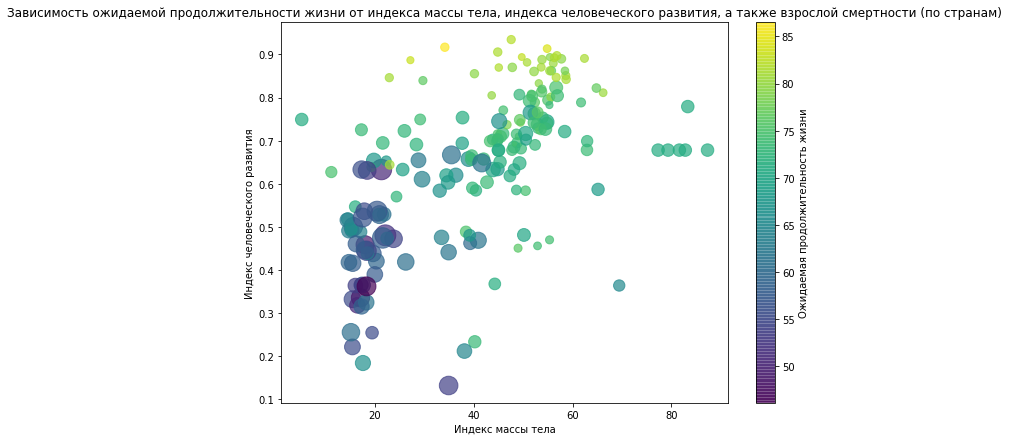

In [255]:
fig, ax = plt.subplots(figsize=(10,7))
graph = ax.scatter(life_exp_concat['Средний ИМТ'], life_exp_concat['ИЧР'],
          c=life_exp_concat['Ожидаемая продолжительность жизни'], s=life_exp_concat['Взрослая смертность'],
          alpha=0.7)

#Настраиваем легенду в виде шкалы
plt.colorbar(graph, label = 'Ожидаемая продолжительность жизни')
plt.xlabel(xlabel='Индекс массы тела')
plt.ylabel(ylabel='Индекс человеческого развития')

ax.set_title('Зависимость ожидаемой продолжительности жизни от индекса массы тела, индекса человеческого развития, а также взрослой смертности (по странам)')

Из построенного графика заметно, что на значение показателя ожидаемой продолжительности жизни сильно влияют показатели индексов массы тела, а также человеческого развития в виде прямой зависимости. 
* Чем выше средний индекс массы тела у населения страны, тем выше продолжительность жизни. 
* Чем выше средний индекс человеческого развития, тем выше продолжительность жизни. 
При этом, чем выше показатель взрослой смертности, соответственно, ниже средняя продолжительность жизни.

# **5. Построение модели: выдвижение гипотез и линейная регрессия**

В связи с тем, что в нашем наборе данных зависимая переменная является количественной, а также в датасете превалируют количественные независимые переменные, при моделировании, прогнозировании и поиске линейных зависимостей мы будем строить множественные линейные регрессии с целевой независимой переменной **ожидаемой продолжительности жизни**. 

Наша линейная регрессия должна обладать рядом предпосылок для адекватного отображения реальной картины исследования:
* Линейная зависимость
* Гомоскедастичность
* Отсутствие мультиколлинеарности
* Нормальное распределение ошибок
* Отсутствие автокорреляции остатков

В связи с тем, что в данных содержатся значения переменных в разрезе 16 лет, а также для каждой из 193 стран, то было принято решение найти средние значения для 16 лет и строить модель для усредненных значений переменных. 

Также, мы предварительно исключили из набора данных переменные, обладающие мультиколлинеарностью:
* затраты на здравоохранение от ВВП
* смертность до 5 лет
* количество лет обучения
* детская худоба от 5 до 9 лет

, а также выделили ряд основных переменных, которые обладают линейной зависимостью с целевой переменной:
* Взрослая смерность
* Смертность от ВИЧ/СПИД
* Младенческая смерность
* Средний ИМТ

**Примечание:** Текст, выделенный полужирным шрифтом** Переменную ИЧР было решено не использовать при построении линейной регрессии, поскольку корреляция между данной переменной и зависимой является весьма сильной, так как ИЧР расчитывается на основе индекс ожидаемой продолжительности жизни.*

In [256]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2927
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Страна                                 2516 non-null   object 
 1   Год                                    2516 non-null   int64  
 2   Статус                                 2516 non-null   object 
 3   Ожидаемая продолжительность жизни      2516 non-null   float64
 4   Взрослая смертность                    2516 non-null   float64
 5   Младенческая смертность                2516 non-null   int64  
 6   Потребление алкоголя                   2516 non-null   float64
 7   Иммунизация гепатит В, %               2516 non-null   float64
 8   Корь, число зараженных                 2516 non-null   int64  
 9   Средний ИМТ                            2516 non-null   float64
 10  Иммунизация полиомиелит, %             2516 non-null   float64
 11  Затр

In [257]:
life_exp_mean_value = life_exp.groupby(life_exp['Год'])['Ожидаемая продолжительность жизни'].mean()
adult_mortality_mean_value = life_exp.groupby(life_exp['Год'])['Взрослая смертность'].mean()
hiv_aids_a_mean_value = life_exp.groupby(life_exp['Год'])['Смертность от ВИЧ/СПИД'].mean()
infant_mortality_mean_value = life_exp.groupby(life_exp['Год'])['Младенческая смертность'].mean()
bmi_mean_value = life_exp.groupby(life_exp['Год'])['Средний ИМТ'].mean()

life_exp_years = pd.concat([life_exp_mean_value, adult_mortality_mean_value, hiv_aids_a_mean_value, infant_mortality_mean_value, bmi_mean_value], axis=1)
life_exp_years

,Ожидаемая продолжительность жизни,Взрослая смертность,Смертность от ВИЧ/СПИД,Младенческая смертность,Средний ИМТ
Год,,,,,
2000,67.978808,163.218543,1.068874,13.000000,36.851656
2001,68.268421,159.815789,1.186184,13.526316,38.371053
2002,68.508917,160.165605,1.226752,14.063694,38.700637
2003,68.657419,155.703226,1.137419,12.561290,37.887742
2004,67.658389,181.389262,1.432215,13.899329,36.910067
2005,68.301316,162.835526,1.361184,14.809211,35.233553
2006,68.672436,166.230769,1.350641,14.083333,37.709615
2007,68.796129,162.116129,1.370323,13.412903,36.685806
2008,68.784416,176.785714,1.335714,14.766234,36.940260


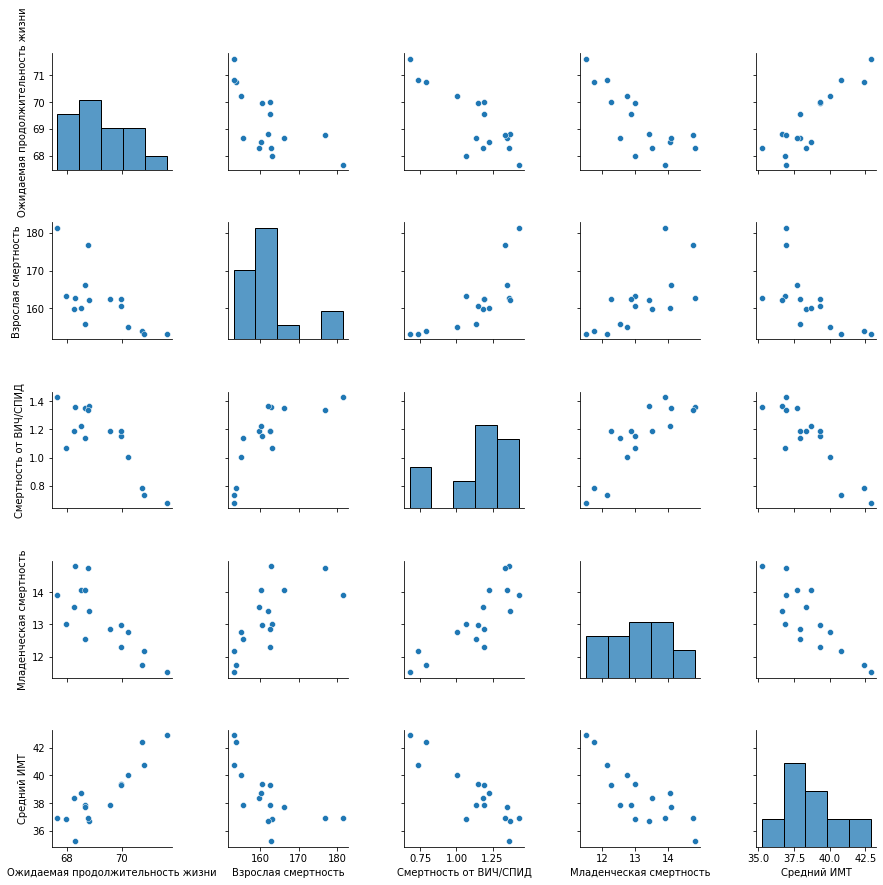

In [258]:
#Построим парные графики, чтобы оценить зависимости между новыми переменными средних значений за год по всем странам
sns.pairplot(life_exp_years)

Построим линейную регрессию для независимой переменной "Средний ИМТ", так как из построенного графика выше у данной переменной видна наиболее сильная связь с зависимой переменной. 

In [259]:
#Построим линейную модель 
X = life_exp_years['Ожидаемая продолжительность жизни']
y = life_exp_years['Средний ИМТ']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=1.6056758882255506, intercept=-72.63254125788733, rvalue=0.8870239175320402, pvalue=4.649845235337709e-06, stderr=0.22337805015799375, intercept_stderr=15.47929945245632)


In [260]:
#Расчитаем значение коэффициент детерминации (R-квадрата). Видим, что коэффициент равен 79%. Это означает, что наша построенная модель объясняет около 79% разброса данных.
r_sq = res.rvalue ** 2
print(r_sq)

0.7868114302738878


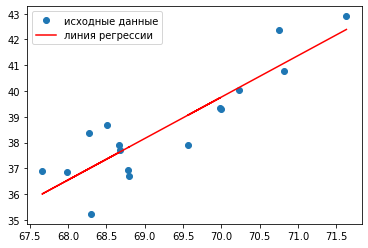

In [261]:
#Построим график нашей линнейной модели, а также график рассеяния - видим положительную линейную зависимость между независимой и целевой переменными
plt.plot(X, y, 'o', label='исходные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

Построим множественную линейную модель для всех новых переменных с усредненными значениями

In [262]:
#Построим множественную линейную регрессию
X_mult = life_exp_years.drop('Ожидаемая продолжительность жизни', axis=1)
y = life_exp_years['Ожидаемая продолжительность жизни']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Ожидаемая продолжительность жизни   R-squared:                       0.802
Model:                                           OLS   Adj. R-squared:                  0.730
Method:                                Least Squares   F-statistic:                     11.13
Date:                               Mon, 12 Dec 2022   Prob (F-statistic):           0.000737
Time:                                       23:32:13   Log-Likelihood:                -11.615
No. Observations:                                 16   AIC:                             33.23
Df Residuals:                                     11   BIC:                             37.09
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Добавление дополнительных переменных в модель не сильно повысило качество модели, так как коэффициент детерминации увеличился с 79% до 80%. При этом даже при уровне значимости p-value = 0.05 коэффициенты при переменных Взрослой смерности, смертности от ВИЧ/СПИД, младенческой смертности и среднем ИМТ оказались незначимы. 

Таким образом, регрессионный анализ усредненных показателей выявил, что наибольшее влияние на целевую переменную оказываем независимая переменная "Средний ИМТ". Одна лишь эта переменная может точно спрогнозировать 79% значений целевой переменной. При этом модель коэффициенты модели будет являться значимыми на уровне значимости p-value = 0.01.


---
Теперь построим регрессионную модель для всех лет наблюдений, а также для уровня развития страны, определенного как "развитая". Ответим на вопрос, за счет каких переменных описывается и прогнозируется целевое значение переменной в разрезе одного года в развитых странах (переменная "Статус" = "Developed").


In [263]:
life_exp_developed = life_exp[(life_exp['Статус'] == 'Developed')]
life_exp_developed.head()

,Страна,Год,Статус,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Потребление алкоголя,"Иммунизация гепатит В, %","Корь, число зараженных",Средний ИМТ,"Иммунизация полиомиелит, %","Затраты на здрав-е, % от гос.расходов","Иммунизация дифтерия, %",Смертность от ВИЧ/СПИД,ВВП,Население,"Детская худоба, от 1 до 19 лет",ИЧР
120,Australia,2007,Developed,81.3,66.0,1,10.56,94.0,11,62.5,92.0,8.53,92.0,0.1,4991.98289,28276.0,0.7,0.918
122,Australia,2005,Developed,81.0,67.0,1,10.30,95.0,10,61.5,92.0,8.45,92.0,0.1,3416.71483,23948.0,0.7,0.910
123,Australia,2004,Developed,86.0,69.0,1,9.84,95.0,70,6.9,92.0,8.57,92.0,0.1,3472.37977,21274.0,0.7,0.908
124,Australia,2003,Developed,83.0,71.0,1,9.97,95.0,91,6.3,92.0,8.32,93.0,0.1,23465.38559,198954.0,0.7,0.905
125,Australia,2002,Developed,79.9,73.0,1,9.84,95.0,32,59.6,92.0,8.39,92.0,0.1,281.81763,196514.0,0.7,0.902


In [264]:
# Видим, что в группу развитых стран вошло большинство стран Северной и Восточной Европы, США, Новая Зеландия, а также Австралия 
life_exp_developed['Страна'].value_counts()

United States of America                                16
Hungary                                                 16
Romania                                                 16
Malta                                                   16
Lithuania                                               16
Latvia                                                  16
Slovakia                                                16
Portugal                                                16
Slovenia                                                16
United Kingdom of Great Britain and Northern Ireland    16
Czechia                                                 16
Cyprus                                                  16
Croatia                                                 16
Poland                                                  16
Bulgaria                                                15
New Zealand                                             12
Spain                                                   

In [265]:
# Удалим категориальные переменные из датасета
life_exp_developed.drop(life_exp_developed.columns[[0,1,2]], axis = 1, inplace = True)
life_exp_developed.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Потребление алкоголя,"Иммунизация гепатит В, %","Корь, число зараженных",Средний ИМТ,"Иммунизация полиомиелит, %","Затраты на здрав-е, % от гос.расходов","Иммунизация дифтерия, %",Смертность от ВИЧ/СПИД,ВВП,Население,"Детская худоба, от 1 до 19 лет",ИЧР
120,81.3,66.0,1,10.56,94.0,11,62.5,92.0,8.53,92.0,0.1,4991.98289,28276.0,0.7,0.918
122,81.0,67.0,1,10.30,95.0,10,61.5,92.0,8.45,92.0,0.1,3416.71483,23948.0,0.7,0.910
123,86.0,69.0,1,9.84,95.0,70,6.9,92.0,8.57,92.0,0.1,3472.37977,21274.0,0.7,0.908
124,83.0,71.0,1,9.97,95.0,91,6.3,92.0,8.32,93.0,0.1,23465.38559,198954.0,0.7,0.905
125,79.9,73.0,1,9.84,95.0,32,59.6,92.0,8.39,92.0,0.1,281.81763,196514.0,0.7,0.902


Построим множественную регрессию для всех переменных датасета и оценим значимость коэффициентов

In [266]:
# Построим множественную линейную регрессию
X_mult = life_exp_developed.drop('Ожидаемая продолжительность жизни', axis=1)
y = life_exp_developed['Ожидаемая продолжительность жизни']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Ожидаемая продолжительность жизни   R-squared:                       0.673
Model:                                           OLS   Adj. R-squared:                  0.661
Method:                                Least Squares   F-statistic:                     56.62
Date:                               Mon, 12 Dec 2022   Prob (F-statistic):           1.93e-78
Time:                                       23:32:13   Log-Likelihood:                -826.39
No. Observations:                                371   AIC:                             1681.
Df Residuals:                                    357   BIC:                             1736.
Df Model:                                         13                                         
Covariance Type:                           nonrobust                                         
                                            coef    std err 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Видим, что при включении всех переменных датасета в построение линейной регрессии, модель способна описать лишь 67% данных (смотрим на коэффициент детерминации). При этом на уровне значимости 0.05 коэффициенты для следующих переменных оказываются незначимыми:
* Младенческая смертность 
* Иммунизация гепатит В  
* Корь, число зараженных   
* Иммунизация полиомиелит   
* Население
* ВВП

Важно отметить, что на практике не стоит одновременно исключать несколько переменных из модели одновременно, стоит это делать постепенно по одной, раз за разом сравнивая качество моделей. Однако для упрощения работы с большим количеством переменных было принято решение исключить незначимые переменные одновременно.   

---

Исключим данные перменные и построим новую модель с меньшим набором независимых предикторов. 

In [267]:
life_exp_developed.head()

,Ожидаемая продолжительность жизни,Взрослая смертность,Младенческая смертность,Потребление алкоголя,"Иммунизация гепатит В, %","Корь, число зараженных",Средний ИМТ,"Иммунизация полиомиелит, %","Затраты на здрав-е, % от гос.расходов","Иммунизация дифтерия, %",Смертность от ВИЧ/СПИД,ВВП,Население,"Детская худоба, от 1 до 19 лет",ИЧР
120,81.3,66.0,1,10.56,94.0,11,62.5,92.0,8.53,92.0,0.1,4991.98289,28276.0,0.7,0.918
122,81.0,67.0,1,10.30,95.0,10,61.5,92.0,8.45,92.0,0.1,3416.71483,23948.0,0.7,0.910
123,86.0,69.0,1,9.84,95.0,70,6.9,92.0,8.57,92.0,0.1,3472.37977,21274.0,0.7,0.908
124,83.0,71.0,1,9.97,95.0,91,6.3,92.0,8.32,93.0,0.1,23465.38559,198954.0,0.7,0.905
125,79.9,73.0,1,9.84,95.0,32,59.6,92.0,8.39,92.0,0.1,281.81763,196514.0,0.7,0.902


In [268]:
# Удалим выбранные переменные из датасета
life_exp_developed.drop(life_exp_developed.columns[[2,4,5,7,11,12]], axis = 1, inplace = True)
life_exp_developed.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ожидаемая продолжительность жизни,Взрослая смертность,Потребление алкоголя,Средний ИМТ,"Затраты на здрав-е, % от гос.расходов","Иммунизация дифтерия, %",Смертность от ВИЧ/СПИД,"Детская худоба, от 1 до 19 лет",ИЧР
120,81.3,66.0,10.56,62.5,8.53,92.0,0.1,0.7,0.918
122,81.0,67.0,10.30,61.5,8.45,92.0,0.1,0.7,0.910
123,86.0,69.0,9.84,6.9,8.57,92.0,0.1,0.7,0.908
124,83.0,71.0,9.97,6.3,8.32,93.0,0.1,0.7,0.905
125,79.9,73.0,9.84,59.6,8.39,92.0,0.1,0.7,0.902


In [269]:
# Построим множественную линейную регрессию для обновленного набора данных
X_mult = life_exp_developed.drop('Ожидаемая продолжительность жизни', axis=1)
y = life_exp_developed['Ожидаемая продолжительность жизни']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Ожидаемая продолжительность жизни   R-squared:                       0.664
Model:                                           OLS   Adj. R-squared:                  0.658
Method:                                Least Squares   F-statistic:                     102.6
Date:                               Mon, 12 Dec 2022   Prob (F-statistic):           4.37e-82
Time:                                       23:32:13   Log-Likelihood:                -831.44
No. Observations:                                371   AIC:                             1679.
Df Residuals:                                    363   BIC:                             1710.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
                                            coef    std err 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Построенная модель без переменных с незначимыми коэффициентами показывает аналогичную точность (R-квадрат = 66%), но при этом не содержит в себе лишних переменных, не способствующих росту качества модели. 
Из результатов построения модели видны следующие закономерности:
* Наибольшее влияние на предсказывание значения ожидаемой продолжительности жизни оказывает ИЧР. Чем выше ИЧР, тем выше значение целевой переменной. 
* Отмечается, что чем выше уровень потребления алкоголя в стране, тем ниже значение ожидаемой продолжительности
* Чем выше индекс массы тела, тем ниже значение целевой переменной
* Чем выше иммуникация от дифтерии, тем выше значение целевой переменной
* Однако модель описывает некоторые противоречивые взаимосвязи между смертностью от ВИЧ/СПИД, затратами на здравоохранение и целевой переменной. Данный результат из моделирования должен быть дополнительно изучен в рамках будущего исследования.



# **6. Ключевые выводы и ограничения**

По итогу проведения исследования были сделаны содержательные выводы и сформулированы ограничения, которые могут послужить источником идей для будущих исследований. 

**Выводы:**

1.   С 2000 по 2015 гг. отмечался активный рост средней ожидаемой продолжительности жизни в 193 странах мира (с 68 до 72 лет).
2.   Наибольшая средняя ожидаемая продолжительность жизни наблюдалась в Германии (86 лет, среднее значение за 2000-2015 года).
3.   Наименьшая продолжительность жизни наблюдается в Сьерра-Леоне (46 лет, среднее значение за 2000-2015 года).
4.   Ключевыми показателями, оказывающими положительное влияние на показатель ожидаемой продолжительности жизни в рассматриваемый период времени, являлись следующие переменные: чем выше сренднее значения количества лет обучения, а также среднее значений индекса массы тела у населения страны, тем выше ожидаемая продолжительность жизни. 
5.   При этом чем выше показатели смерности среди взрослых и детей, а также смерности от ВИЧ/СПИД и кори, тем ниже ожидаемая продолжительность жизни в стране.
6.   Факторы здоровья (ИМТ, Потребление алкоголя), факторы смертности (взрослая и сладенческая смертность, смертность от ВИЧ/СПИД), а также экономические факторы (ИЧР, Количество лет обучения) оказывают наибольшее влияние на предсказывание значения ожидаемой продолжительности жизни. 
7.   Факторы иммунизации в меньшей степени коррелируют с ожидаемой продолжительностью жизни.
8.   Густонаселенность страны не влияет на ожидаемую продолжительность жизни.
9.   Повышенный индекс массы тела негативно влияет на ожидаемую продолжительность жизни. Чем выше среднее значение индекса, тем ниже ожидаемая продолжительность жизни. В данном случае мы говорим о наличии избыточного веса у взрослого населения, что харктерно для стран Северной и Южной Америки.
10.  При этом распространенность худобы среди детей и подростков снижает значение показателя ожжидаемой продолжительности жизни. В данном случае мы говорим о наличии дефицита массы тема у детей, что характерно для большиства стран Африки.


**Ограничения:**

1.   Исследуеные нами в работе данные содержали экономические, социальные, здравоохранительные показатели лишь за период с 2000 по 2015 гг. Сформулированные нами выводы являются актуальными лишь на указанный период, однако на протяжении всего 16-летнего периода прослеживался как глобальный, так и во многих странах локальный тренд на увеличение значения показателя среднего уровня ожидаемой продолжительности жизни. В связи с чем можно выдвинуть гипотезу о непрерывности роста показателя и в более поздний временной период с 2016 года по настоящее время. 
2.   Ряд стран содержали большое кол-во пропусков в данных, в связи с чем они были исключены из рассмотрения в дальнейшем исследовании. Одним из направлений развития данного ислледования может стать включение пропущенных значений для данных стран и их последующий анализ. 

